In [134]:
import pandas as pd
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance
from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Part 1: Feature importance: London

# Imports

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
london = pd.read_csv('gdrive/MyDrive/colab_notebooks/london_sample.csv')
london

,month,longitude,latitude,lsoa_code,stringency,covid,last_outcome_investigation_complete_no_suspect_identified,last_outcome_category_status_update_unavailable,last_outcome_category_suspect_present_action_taken,crime_type_bicycle_theft,crime_type_burglary,crime_type_criminal_damage_and_arson,crime_type_drugs,crime_type_other_crime,crime_type_other_theft,crime_type_possession_of_weapons,crime_type_public_order,crime_type_robbery,crime_type_shoplifting,crime_type_theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,crimes_count
0,2020-11,-0.109323,51.468731,1003045,68.1007,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,59213
1,2019-03,-0.139662,51.512911,1033595,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,73572
2,2021-06,-0.214779,51.444612,1004635,52.5393,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,63247
3,2018-02,-0.037628,51.650525,1001504,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,58614
4,2018-12,-0.114509,51.361712,1001172,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,66738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-03,-0.112715,51.603431,1001971,0.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,62817
199996,2020-08,0.035658,51.581338,1003795,67.5603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64580
199997,2021-03,-0.368216,51.571013,1002206,79.5360,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,56772
199998,2019-04,-0.096049,51.374219,1001045,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,67977


In [6]:
london['month'] = pd.to_datetime(london['month'])
london['month'] = london['month'].astype(int)

london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [7]:
london = london.drop_duplicates(keep=False)

In [8]:
other = pd.read_csv('gdrive/MyDrive/colab_notebooks/other_cities_sample.csv', index_col=0)
other

,month,longitude,latitude,lsoa_code,stringency,covid,last_outcome_investigation_complete_no_suspect_identified,last_outcome_category_status_update_unavailable,last_outcome_category_suspect_present_action_taken,crime_type_bicycle_theft,crime_type_burglary,crime_type_criminal_damage_and_arson,crime_type_drugs,crime_type_other_crime,crime_type_other_theft,crime_type_possession_of_weapons,crime_type_public_order,crime_type_robbery,crime_type_shoplifting,crime_type_theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,crimes_count
0,2020-08-01,-0.309091,51.490999,1002565,67.5603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64580.0
1,2019-12-01,0.069631,51.552642,1003728,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65919.0
2,2018-09-01,-0.291239,51.553120,1000635,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,64272.0
3,2020-01-01,-0.210964,51.454221,1004503,0.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,69864.0
4,2019-12-01,-0.147038,51.470350,1004564,0.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,65919.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-06-01,-0.127242,51.544817,1000864,0.0000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,65393.0
199996,2021-08-01,-0.241744,51.455541,1004644,43.9800,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60967.0
199997,2020-09-01,-0.006373,51.581359,1004466,65.6114,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64442.0
199998,2020-07-01,-0.219236,51.504246,1001943,65.1840,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,63679.0


In [9]:
other['month'] = pd.to_datetime(other['month'])
other['month'] = other['month'].astype(int)

other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [10]:
other = other.drop_duplicates(keep=False)

In [ ]:
# functions 
class FeatureSelectionML():

    def tts(self, X, y):
        '''
        using kfold validation as it is a better method than train_test_split
        '''

        self.X_train, self.X_test, self.y_train, self.y_test  = train_test_split(X, y, random_state=100, test_size=0.3)

        return

    def model_fitting(self, model):

      model.fit(self.X_train, self.y_train)
      y_pred = model.predict(self.X_test)

      return

fsml = FeatureSelectionML()

In [ ]:
# feature importance can be found using decision tree algos since you can derive info on how 
# relevant each feature was for making the decisions
# xGboost is used here because it is shown to be better than other methods 

X = london.iloc[:,0:22]
y = london.iloc[:,-1:]

# train test split
fsml.tts(X, y)

# setting the model
xg_london = XGBRegressor(n_estimators=100)

# fitting
fsml.model_fitting(xg_london)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


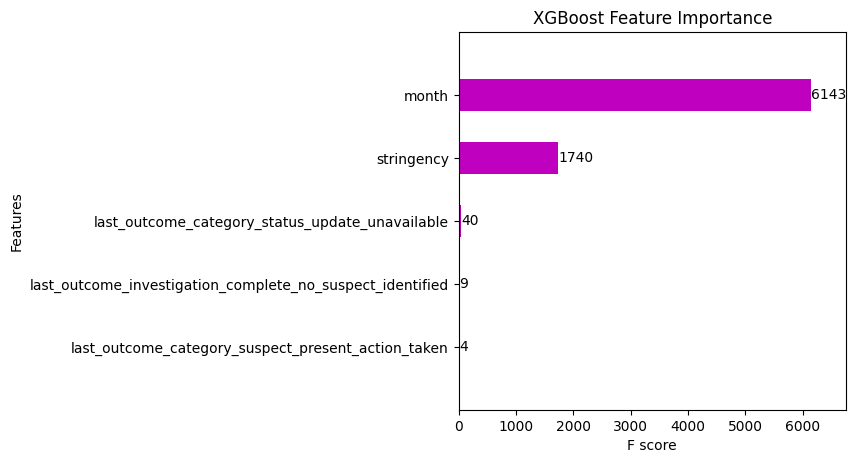

In [ ]:
# plot feature importance
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plot_importance(xg_london, ax=ax, grid=False, title='XGBoost Feature Importance', importance_type='weight', height=0.5, color='m')
plt.show()

In [ ]:
# xgboost seems to give importance to only two features so lets try random forests;

In [ ]:
# RF

# fit model 
rf_london = RandomForestRegressor(n_estimators=100)

fsml.tts(X, y)

fsml.model_fitting(rf_london)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


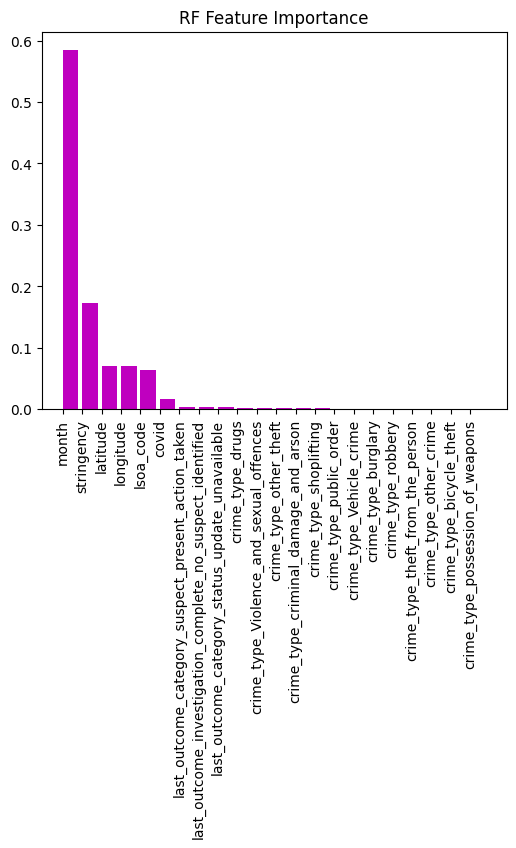

In [ ]:
feature_importance = rf_london.feature_importances_

# sorting features in descending order
sorted_feats = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6, 5), dpi=100)
plt.title('RF Feature Importance')
plt.bar(range(fsml.X_train.shape[1]), feature_importance[sorted_feats], align='edge', color='m')
plt.xticks(range(fsml.X_train.shape[1]), fsml.X_train.columns[sorted_feats], rotation=90)
plt.show()

# Feature importance: Other cities

In [ ]:
X_other = other.iloc[:,0:22]
y_other = other.iloc[:,-1:]

fsml.tts(X, y)

xg_other = XGBRegressor(n_estimators=100)
fsml.model_fitting(xg_other)

[17:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


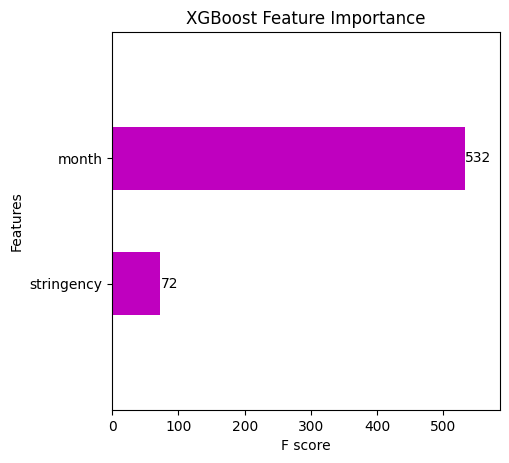

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plot_importance(xg_other, ax=ax, grid=False, title='XGBoost Feature Importance', importance_type='weight', height=0.5, color='m')
plt.show()

In [ ]:
rf_other = RandomForestRegressor(n_estimators=100)
rf_other.fit(fsml.X_train, fsml.y_train)
y_pred = rf_other.predict(fsml.X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


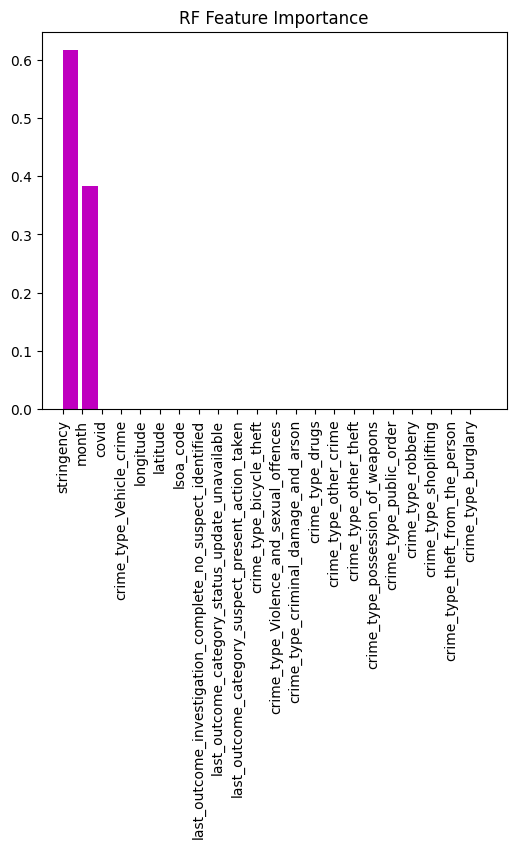

In [ ]:
feature_importance2 = rf_other.feature_importances_

sorted_feats = np.argsort(feature_importance2)[::-1]

plt.figure(figsize=(6, 5), dpi=100)
plt.title('RF Feature Importance')
plt.bar(range(fsml.X_train.shape[1]), feature_importance2[sorted_feats], align='edge', color='m')
plt.xticks(range(fsml.X_train.shape[1]), fsml.X_train.columns[sorted_feats], rotation=90)
plt.show()

# Part 2: ML

# London Regression

In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from numpy import where
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# remove non important features
london = london.drop(london.iloc[:, 5:22], axis=1)
london

,month,longitude,latitude,lsoa_code,stringency,crimes_count
0,1604188800000000000,-0.109323,51.468731,1003045,68.1007,59213
1,1551398400000000000,-0.139662,51.512911,1033595,0.0000,73572
2,1622505600000000000,-0.214779,51.444612,1004635,52.5393,63247
3,1517443200000000000,-0.037628,51.650525,1001504,0.0000,58614
4,1543622400000000000,-0.114509,51.361712,1001172,0.0000,66738
...,...,...,...,...,...,...
199995,1519862400000000000,-0.112715,51.603431,1001971,0.0000,62817
199996,1596240000000000000,0.035658,51.581338,1003795,67.5603,64580
199997,1614556800000000000,-0.368216,51.571013,1002206,79.5360,56772
199998,1554076800000000000,-0.096049,51.374219,1001045,0.0000,67977


In [ ]:
london = london.drop_duplicates(keep=False)
london

,month,longitude,latitude,lsoa_code,stringency,crimes_count
0,1604188800000000000,-0.109323,51.468731,1003045,68.1007,59213
2,1622505600000000000,-0.214779,51.444612,1004635,52.5393,63247
3,1517443200000000000,-0.037628,51.650525,1001504,0.0000,58614
4,1543622400000000000,-0.114509,51.361712,1001172,0.0000,66738
5,1567296000000000000,-0.349878,51.529078,1001260,0.0000,63326
...,...,...,...,...,...,...
199992,1609459200000000000,0.092491,51.498181,1033741,86.8852,47958
199993,1593561600000000000,-0.313598,51.369522,1002941,65.1840,63679
199996,1596240000000000000,0.035658,51.581338,1003795,67.5603,64580
199997,1614556800000000000,-0.368216,51.571013,1002206,79.5360,56772


In [58]:
# functions 
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.base import is_classifier, is_regressor


class ModelSplitAndEval():
    
    def split_x_y(self, df):
        '''
        splits dataset to x (features) and y (outcome/target var)
        '''
        df = pd.DataFrame(df)

        self.X = df.iloc[:, 0:5]
        # last col is the target col
        self.y = df.iloc[:, -1:]

        return self.X, self.y


    def kfold_cv(self, X, y, model):
        '''
        using kfold validation as it is a better method than train_test_split
        '''
        # prepare the cross-validation procedure
        cv = KFold(n_splits=5, shuffle=True) #random_state=100,
        
        # ensuring data is in df form
        #X = pd.DataFrame(X)
        #y = pd.DataFrame(y)
        acc_kfold = []

        for train_index, test_index in cv.split(X):
            self.X_train, self.X_test = X.iloc[train_index], X.iloc[test_index]
            self.y_train, self.y_test = y.iloc[train_index], y.iloc[test_index]
              
            
            # fitting and predicting model
            model.fit(self.X_train, self.y_train)
            self.y_pred = model.predict(self.X_test)
            acc_kfold.append(model.score(self.X_test, self.y_test))

        
        # printing accuracies
        accuracies = print('accuracies: ', acc_kfold)
        mean_ = print('mean accuracy: ', mean(acc_kfold) * 100, '%')
        std_ = print('standard deviation:', np.std(acc_kfold))
        
        # if model is regressor prints metrics for regression if not prints for classification
        if is_regressor(model):
          mae = mean_absolute_error(self.y_test, self.y_pred)
          mse = mean_squared_error(self.y_test, self.y_pred)
          r2 = r2_score(self.y_test, self.y_pred)
        
          print('mean absolute error:',mae)
          print('mean squared error:', mse)
          print('R2:', r2)

        else: 
            prec = print("Precision:", metrics.precision_score(self.y_test, self.y_pred))
            recall = print("Recall:", metrics.recall_score(self.y_test, self.y_pred))
            f1score = f1_score(self.y_test, self.y_pred, average='binary')
            print('F1 Score: %.3f' % f1score)


        return


m = ModelSplitAndEval()

In [ ]:
# checking if dataset is linear to choose the best suited ml regressor:
# we use linear regression and check the r2 score; if it is high data is linear if not then 
# it is non linear

In [ ]:
# linear regression
m.split_x_y(london)

lin_regressor1 = LinearRegression().fit(m.X, m.y)
m.kfold_cv(m.X, m.y, lin_regressor1)
# based on the r2 score our data is probably nonlinear

accuracies:  [0.5740557264837605, 0.572956129500177, 0.5661292580143991, 0.5699266990474128, 0.5718427405825512, 0.5721631097090147, 0.5751186460781896, 0.5746984727779121, 0.564632400875916, 0.5707246946764989]
mean accuracy:  57.122478777458305 %
standard deviation: 0.0033295916847464547
mean absolute error: 0.2741737123484028
mean squared error: 0.10234830151712476
R2: 0.5707246946764989


In [ ]:
# RF
# using two more ml model that work well for linear and nonlinear, rf and knn and comparing results
m.split_x_y(london)
lon_rf = RandomForestRegressor(n_estimators=10) #random_state=100
m.kfold_cv(m.X, m.y, lon_rf)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 0.0
mean squared error: 0.0
R2: 1.0


In [ ]:
# the accuracy is very high so it might be overfitting; 
# we are ensuring that there were no common rows in test and train data 
matching = m.X_test.merge(m.X_train, how = 'inner')
matching

,month,longitude,latitude,lsoa_code,stringency


In [ ]:
# no leak of data from train to test

In [ ]:
# KNN
sc = MinMaxScaler()
london = sc.fit_transform(london)

m.split_x_y(london)
lon_knn = KNeighborsRegressor(n_neighbors=3,
#                           algorithm='ball_tree',
#                           leaf_size=30,
                          p=1,
                          metric='minkowski',
                          weights='distance',
                         )

m.kfold_cv(m.X, m.y, lon_knn)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 3.5783710299562e-12
mean squared error: 3.9709519123982065e-23
R2: 1.0


# Other Cities

In [ ]:
other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190788 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      190788 non-null  int64  
 1   longitude                                                  190788 non-null  float64
 2   latitude                                                   190788 non-null  float64
 3   lsoa_code                                                  190788 non-null  int64  
 4   stringency                                                 190788 non-null  float64
 5   covid                                                      190788 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  190788 non-null  int64  
 7   last_outcome_category_status_update_unavailable            190788 non-null  int64  

In [ ]:
# for other cities we remove the non important features first
# feature selection with rf and xgboost showed only month and stringency to be important for predicting crime count 
# rf does well even with the non important features inncluded but knn doesn't

In [139]:
other_important_only = other.drop(columns=['longitude', 'latitude', 'covid'])
other_important_only

# we are keeping lsoa code even though it was non-important feature because if we remove it the unique rows are only
# going to be 45. Since month stringency and crime are the sum of each month

,month,lsoa_code,stringency,last_outcome_investigation_complete_no_suspect_identified,last_outcome_category_status_update_unavailable,last_outcome_category_suspect_present_action_taken,crime_type_bicycle_theft,crime_type_burglary,crime_type_criminal_damage_and_arson,crime_type_drugs,crime_type_other_crime,crime_type_other_theft,crime_type_possession_of_weapons,crime_type_public_order,crime_type_robbery,crime_type_shoplifting,crime_type_theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,crimes_count
0,1596240000000000000,1002565,67.5603,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64580.0
1,1575158400000000000,1003728,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65919.0
2,1535760000000000000,1000635,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,64272.0
3,1577836800000000000,1004503,0.0000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,69864.0
4,1575158400000000000,1004564,0.0000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,65919.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1546300800000000000,1004714,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,67773.0
199995,1527811200000000000,1000864,0.0000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,65393.0
199996,1627776000000000000,1004644,43.9800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60967.0
199998,1593561600000000000,1001943,65.1840,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,63679.0


In [140]:
other_important_only = other_important_only.drop(other_important_only.iloc[:, 3:19], axis=1)
other_important_only

,month,lsoa_code,stringency,crimes_count
0,1596240000000000000,1002565,67.5603,64580.0
1,1575158400000000000,1003728,0.0000,65919.0
2,1535760000000000000,1000635,0.0000,64272.0
3,1577836800000000000,1004503,0.0000,69864.0
4,1575158400000000000,1004564,0.0000,65919.0
...,...,...,...,...
199994,1546300800000000000,1004714,0.0000,67773.0
199995,1527811200000000000,1000864,0.0000,65393.0
199996,1627776000000000000,1004644,43.9800,60967.0
199998,1593561600000000000,1001943,65.1840,63679.0


In [141]:
other_no_dups = other_important_only.drop_duplicates()
other_no_dups.shape
# with lsoa code our rows are 130k

(108826, 4)

In [142]:
# checking for linearity
m.split_x_y(other_no_dups)
lin_regressor2 = LinearRegression().fit(m.X, m.y)
m.kfold_cv(m.X, m.y, lin_regressor2)
# data is linear probably because long, lat and covid was not included 

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 2.5566976261555176e-12
mean squared error: 3.266612819212398e-23
R2: 1.0


In [ ]:
# RF
m.split_x_y(other_no_dups)
other_rf = RandomForestRegressor(n_estimators=100, random_state=100)
m.kfold_cv(m.X, m.y, other_rf)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 0.0
mean squared error: 0.0
R2: 1.0


In [ ]:
# as we can see the ml models are probably overfitting. that is likely because the 
# y target has many repeating values since it is the average crime count over each month
# if we keep only the unique we would have just 45 rows which is impossible to do ml on.
# so our second best option is to try and predict covid (if a crime occured during covid or before) 
# using classification instead of crime count using regression
# since we already see that covid has an effect on crime from the plots and correlations

# Classification on covid as target
# Preparing data



In [ ]:
# feature analysis shows stringency and month to be the most important features
# so we drop long lat but we keep lsoa code for reason described above

In [53]:
# had to repeat the same process because covid col was removed from the data for regression
london_clf = pd.read_csv('gdrive/MyDrive/colab_notebooks/london_sample.csv')
london_clf['month'] = pd.to_datetime(london_clf['month'])
london_clf['month'] = london_clf['month'].astype(int)
london_clf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [54]:
last_column = london_clf.pop('covid')
london_clf.insert(22, 'covid', last_column)
london_clf

,month,longitude,latitude,lsoa_code,stringency,last_outcome_investigation_complete_no_suspect_identified,last_outcome_category_status_update_unavailable,last_outcome_category_suspect_present_action_taken,crime_type_bicycle_theft,crime_type_burglary,crime_type_criminal_damage_and_arson,crime_type_drugs,crime_type_other_crime,crime_type_other_theft,crime_type_possession_of_weapons,crime_type_public_order,crime_type_robbery,crime_type_shoplifting,crime_type_theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,crimes_count,covid
0,1604188800000000000,-0.109323,51.468731,1003045,68.1007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,59213,1
1,1551398400000000000,-0.139662,51.512911,1033595,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,73572,0
2,1622505600000000000,-0.214779,51.444612,1004635,52.5393,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,63247,1
3,1517443200000000000,-0.037628,51.650525,1001504,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,58614,0
4,1543622400000000000,-0.114509,51.361712,1001172,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,66738,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1519862400000000000,-0.112715,51.603431,1001971,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,62817,0
199996,1596240000000000000,0.035658,51.581338,1003795,67.5603,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64580,1
199997,1614556800000000000,-0.368216,51.571013,1002206,79.5360,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,56772,1
199998,1554076800000000000,-0.096049,51.374219,1001045,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,67977,0


In [55]:
# remove non important features
london_clf = london_clf.drop(london_clf.iloc[:, 5:21], axis=1)
london_clf = london_clf.drop(london_clf.iloc[:, 1:3], axis=1)

london_clf

,month,lsoa_code,stringency,crimes_count,covid
0,1604188800000000000,1003045,68.1007,59213,1
1,1551398400000000000,1033595,0.0000,73572,0
2,1622505600000000000,1004635,52.5393,63247,1
3,1517443200000000000,1001504,0.0000,58614,0
4,1543622400000000000,1001172,0.0000,66738,0
...,...,...,...,...,...
199995,1519862400000000000,1001971,0.0000,62817,0
199996,1596240000000000000,1003795,67.5603,64580,1
199997,1614556800000000000,1002206,79.5360,56772,1
199998,1554076800000000000,1001045,0.0000,67977,0


In [56]:
london_clf = london_clf.drop_duplicates(keep=False)
london_clf

,month,lsoa_code,stringency,crimes_count,covid
2,1622505600000000000,1004635,52.5393,63247,1
5,1567296000000000000,1001260,0.0000,63326,0
6,1533081600000000000,1004011,0.0000,64528,0
7,1525132800000000000,1002309,0.0000,66002,0
8,1530403200000000000,1004015,0.0000,69301,0
...,...,...,...,...,...
199990,1535760000000000000,1001346,0.0000,64272,0
199992,1609459200000000000,1033741,86.8852,47958,1
199993,1593561600000000000,1002941,65.1840,63679,1
199996,1596240000000000000,1003795,67.5603,64580,1


In [59]:
# first we have to ensure that the data is balanced between the two classes
m.split_x_y(london)

def check_balance(df):
  
  total = len(df)
  balance_1 = df[df['covid'] == 1].count()
  print(balance_1)
  balance_0 = df[df['covid'] == 0].count()
  percentage1 = (balance_1 / total) * 100
  perecentage0 = (balance_0 / total) * 100
  

  return perecentage0, percentage1

In [60]:
check_balance(london_clf)
# split is 41-58

month           27534
lsoa_code       27534
stringency      27534
crimes_count    27534
covid           27534
dtype: int64


(month           58.031278
 lsoa_code       58.031278
 stringency      58.031278
 crimes_count    58.031278
 covid           58.031278
 dtype: float64, month           41.968722
 lsoa_code       41.968722
 stringency      41.968722
 crimes_count    41.968722
 covid           41.968722
 dtype: float64)

# London classification



In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

class FiguresForClassification():
      
  def confusion_matrix_plot(self, X_test, y_test, y_pred, model):

    '''
    plots a confusion matrix
    '''

    conf_matrix = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(4, 2), dpi=200)
    conf_matrix_plt = plot_confusion_matrix(model,
                                        X_test,
                                        y_test,
                                        cmap=plt.cm.RdPu, # RdPu
                                        normalize='true',
                                        ax=ax)

    plt.title('Confusion Matrix ({})'.format(model))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show(conf_matrix_plt)

    plt.show()

    return

clf_plots = FiguresForClassification()

In [62]:
#RF
m.split_x_y(london_clf)
lon_clf_rf = RandomForestClassifier(n_estimators=100) #, random_state=100
m.kfold_cv(m.X, m.y, lon_clf_rf)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


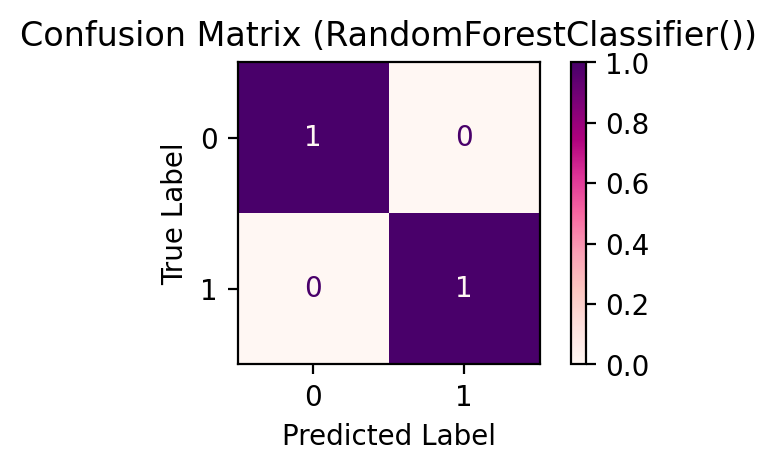

In [72]:
#confusion matrix rf
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, lon_clf_rf)

In [73]:
# checking if removing month col improves results since covid and month give roughly the same info

london_nomonth = london_clf.drop(columns=['month'])
london_nomonth

,lsoa_code,stringency,crimes_count,covid
2,1004635,52.5393,63247,1
5,1001260,0.0000,63326,0
6,1004011,0.0000,64528,0
7,1002309,0.0000,66002,0
8,1004015,0.0000,69301,0
...,...,...,...,...
199990,1001346,0.0000,64272,0
199992,1033741,86.8852,47958,1
199993,1002941,65.1840,63679,1
199996,1003795,67.5603,64580,1


In [74]:
#RF
m.split_x_y(london_nomonth)
lon_clf_nm = RandomForestClassifier(n_estimators=10, bootstrap=True) #, random_state=100
# setting min_weight_fraction_leaf=0.5 gives 0.58 accuracy so the model does become worse with 
# bad tuning
m.kfold_cv(m.X, m.y, lon_clf_nm)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


In [75]:
# checking to see if any of the rain data was leaked to the test data
matching2 = m.X_test.merge(m.X_train, how = 'inner')
matching2

,lsoa_code,stringency,crimes_count,covid


In [143]:
#KNN
sc = MinMaxScaler()
london_clf = sc.fit_transform(london_clf)

m.split_x_y(london_clf)

lon_clf_knn = KNeighborsClassifier(n_neighbors=5,
#                           algorithm='ball_tree',
#                           leaf_size=30,
                          p=2,
                          metric='minkowski',
                          weights='distance',
                         )

m.kfold_cv(m.X, m.y, lon_clf_knn)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


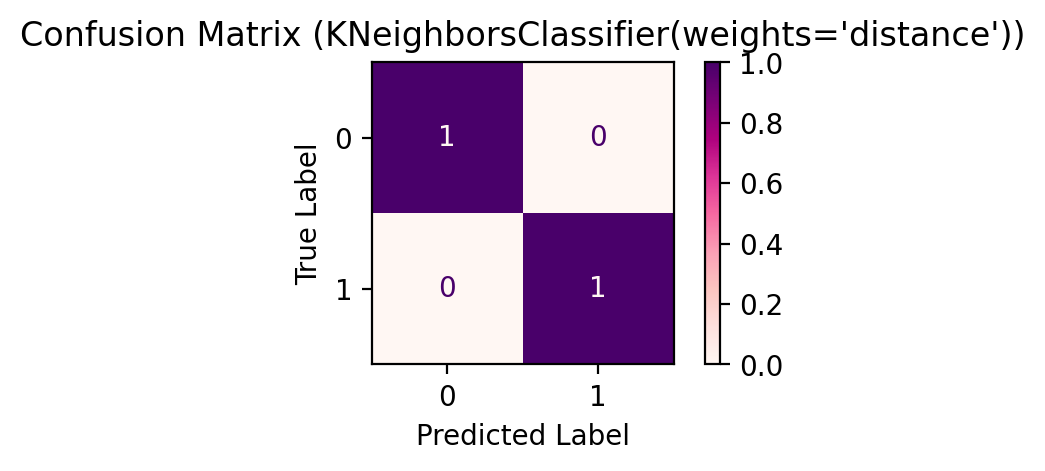

In [89]:
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, lon_clf_knn)

In [ ]:
matching2 = m.X_test.merge(m.X_train, how = 'inner')
matching2

,month,lsoa_code,stringency,crimes_count,covid


# Other cities classification 

In [78]:
other_clf = pd.read_csv('gdrive/MyDrive/colab_notebooks/other_cities_sample.csv', index_col=0)
other_clf['month'] = pd.to_datetime(other_clf['month'])
other_clf['month'] = other_clf['month'].astype(int)
other_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [79]:
last_column = other_clf.pop('covid')
other_clf.insert(22, 'covid', last_column)
other_clf

,month,longitude,latitude,lsoa_code,stringency,last_outcome_investigation_complete_no_suspect_identified,last_outcome_category_status_update_unavailable,last_outcome_category_suspect_present_action_taken,crime_type_bicycle_theft,crime_type_burglary,crime_type_criminal_damage_and_arson,crime_type_drugs,crime_type_other_crime,crime_type_other_theft,crime_type_possession_of_weapons,crime_type_public_order,crime_type_robbery,crime_type_shoplifting,crime_type_theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,crimes_count,covid
0,1596240000000000000,-0.309091,51.490999,1002565,67.5603,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64580.0,1
1,1575158400000000000,0.069631,51.552642,1003728,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65919.0,0
2,1535760000000000000,-0.291239,51.553120,1000635,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,64272.0,0
3,1577836800000000000,-0.210964,51.454221,1004503,0.0000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,69864.0,0
4,1575158400000000000,-0.147038,51.470350,1004564,0.0000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,65919.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1527811200000000000,-0.127242,51.544817,1000864,0.0000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,65393.0,0
199996,1627776000000000000,-0.241744,51.455541,1004644,43.9800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60967.0,1
199997,1598918400000000000,-0.006373,51.581359,1004466,65.6114,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64442.0,1
199998,1593561600000000000,-0.219236,51.504246,1001943,65.1840,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,63679.0,1


In [80]:
# remove non important features
other_clf = other_clf.drop(other_clf.iloc[:, 5:21], axis=1)
other_clf = other_clf.drop(other_clf.iloc[:, 1:3], axis=1)

other_clf

,month,lsoa_code,stringency,crimes_count,covid
0,1596240000000000000,1002565,67.5603,64580.0,1
1,1575158400000000000,1003728,0.0000,65919.0,0
2,1535760000000000000,1000635,0.0000,64272.0,0
3,1577836800000000000,1004503,0.0000,69864.0,0
4,1575158400000000000,1004564,0.0000,65919.0,0
...,...,...,...,...,...
199995,1527811200000000000,1000864,0.0000,65393.0,0
199996,1627776000000000000,1004644,43.9800,60967.0,1
199997,1598918400000000000,1004466,65.6114,64442.0,1
199998,1593561600000000000,1001943,65.1840,63679.0,1


In [81]:
other_clf = other_clf.drop_duplicates(keep=False)
other_clf

,month,lsoa_code,stringency,crimes_count,covid
3,1577836800000000000,1004503,0.0000,69864.0,0
4,1575158400000000000,1004564,0.0000,65919.0,0
5,1561939200000000000,1004424,0.0000,69256.0,0
6,1546300800000000000,1000697,0.0000,67773.0,0
7,1601510400000000000,1004539,67.9013,64270.0,1
...,...,...,...,...,...
199988,1622505600000000000,1002011,52.5393,63247.0,1
199990,1522540800000000000,1003138,0.0000,62269.0,0
199993,1543622400000000000,1002041,0.0000,66738.0,0
199996,1627776000000000000,1004644,43.9800,60967.0,1


In [90]:
# rf
from sklearn.metrics import accuracy_score

m.split_x_y(other_clf)
other_clf_rf = RandomForestClassifier(n_estimators=100) #random_state=100
m.kfold_cv(m.X, m.y, other_clf_rf)
print('acc_score', accuracy_score(m.y_test, m.y_pred))


accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000
acc_score 1.0


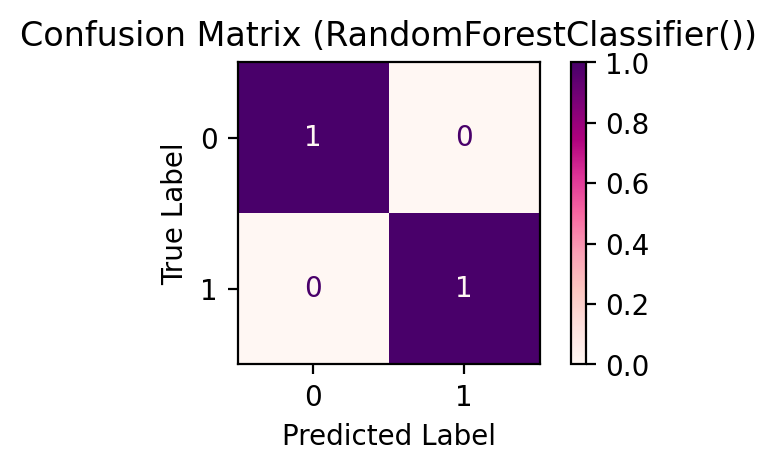

In [91]:
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, other_clf_rf)

In [84]:
matching2 = m.X_test.merge(m.X_train, how = 'inner')
matching2

,month,lsoa_code,stringency,crimes_count,covid


In [144]:
#KNN
sc = MinMaxScaler()
other_clf = sc.fit_transform(other_clf)

m.split_x_y(other_clf)
other_clf_knn = KNeighborsClassifier(n_neighbors=5,
#                           algorithm='ball_tree',
#                           leaf_size=30,
                          p=2,
                          metric='minkowski',
                          weights='distance',
                         )

m.kfold_cv(m.X, m.y, other_clf_knn)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


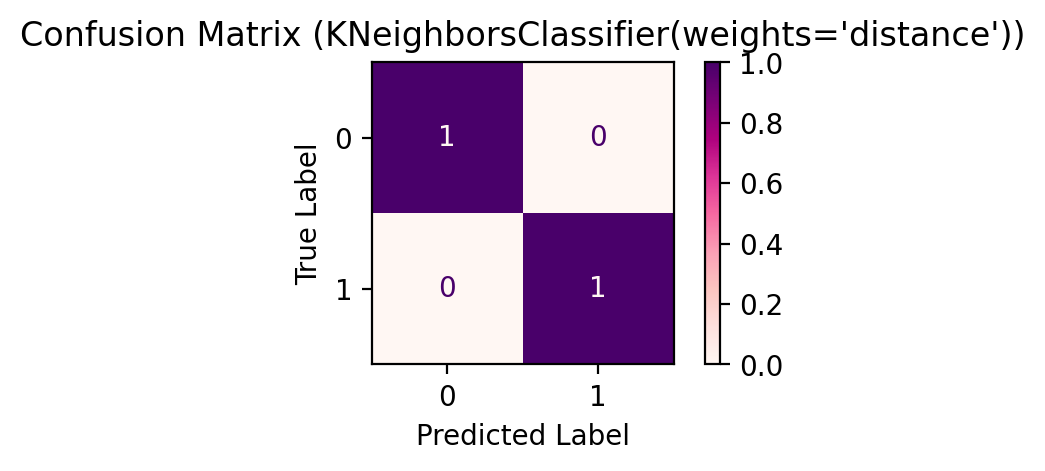

In [86]:
#confusion matrix knn
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, other_clf_knn)

# Part 3: Clustering

In [ ]:
# one last thing we can examine is clustering which is an unsupervised ML algorithm
# we can see if the algorithm (kmeans) forms different clusters for before and after covid for our data 
# since clustering forms clusters based on similarity it might be able to 
# to pick up the differences before and during covid and form clusters

# London

In [11]:
london

,month,longitude,latitude,lsoa_code,stringency,covid,last_outcome_investigation_complete_no_suspect_identified,last_outcome_category_status_update_unavailable,last_outcome_category_suspect_present_action_taken,crime_type_bicycle_theft,crime_type_burglary,crime_type_criminal_damage_and_arson,crime_type_drugs,crime_type_other_crime,crime_type_other_theft,crime_type_possession_of_weapons,crime_type_public_order,crime_type_robbery,crime_type_shoplifting,crime_type_theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,crimes_count
0,1604188800000000000,-0.109323,51.468731,1003045,68.1007,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,59213
1,1551398400000000000,-0.139662,51.512911,1033595,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,73572
2,1622505600000000000,-0.214779,51.444612,1004635,52.5393,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,63247
3,1517443200000000000,-0.037628,51.650525,1001504,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,58614
4,1543622400000000000,-0.114509,51.361712,1001172,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,66738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1519862400000000000,-0.112715,51.603431,1001971,0.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,62817
199996,1596240000000000000,0.035658,51.581338,1003795,67.5603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64580
199997,1614556800000000000,-0.368216,51.571013,1002206,79.5360,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,56772
199998,1554076800000000000,-0.096049,51.374219,1001045,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,67977


In [12]:
# corelation matrix for each cluster
def corr_matrix(df, linewidth, **kwargs):

  plt.figure(figsize=(18,12), dpi=200)
  df_corr=df.corr()
  sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, linewidth=linewidth)
  plt.show()

  return

In [ ]:
# we remove the crime types and outcome cols as upon testing they made the model perform  worse
# and also they were found to be non-important during feature analysis 

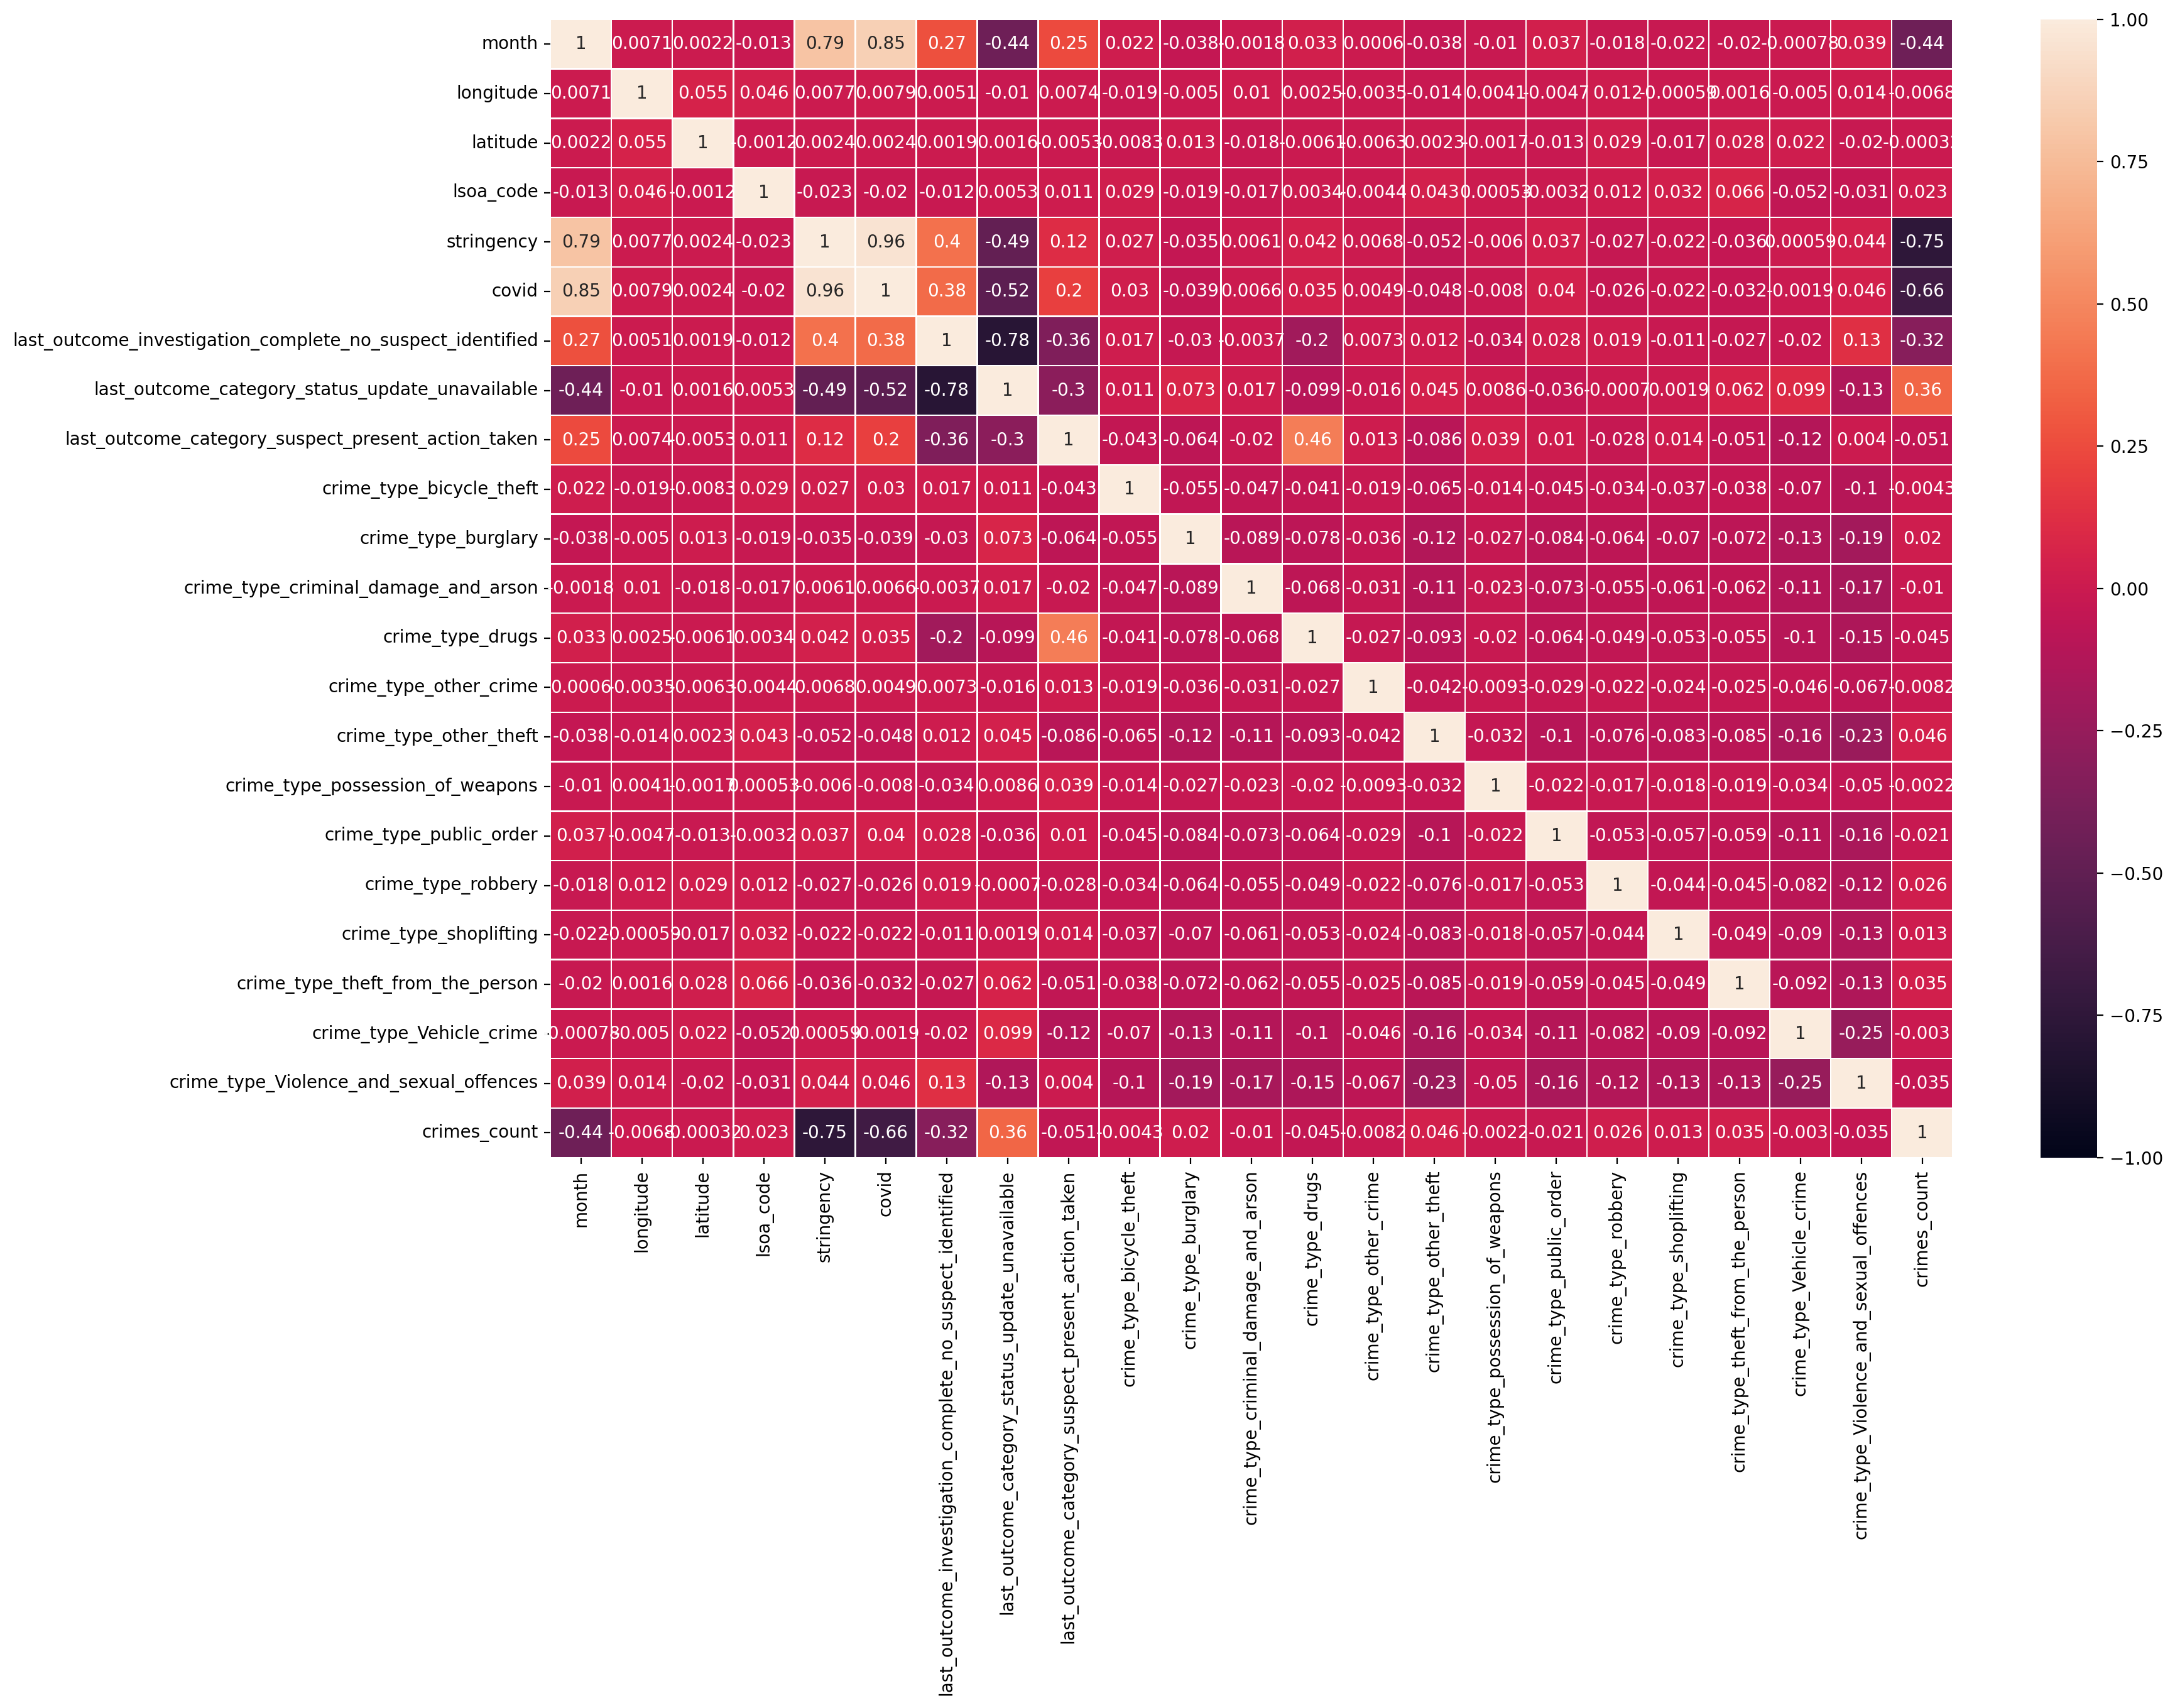

In [13]:
# first we are doing a correlation matrix to see which values we can drop
corr_matrix(london, linewidth=0.5)

In [ ]:
# as we can see crime types and outcomes show no correlation 

In [125]:
clustering_lon = london.drop(london.iloc[:, 6:22], axis=1) # 6:22
clustering_lon

,month,longitude,latitude,lsoa_code,stringency,covid,crimes_count
0,1604188800000000000,-0.109323,51.468731,1003045,68.1007,1,59213
1,1551398400000000000,-0.139662,51.512911,1033595,0.0000,0,73572
2,1622505600000000000,-0.214779,51.444612,1004635,52.5393,1,63247
3,1517443200000000000,-0.037628,51.650525,1001504,0.0000,0,58614
4,1543622400000000000,-0.114509,51.361712,1001172,0.0000,0,66738
...,...,...,...,...,...,...,...
199995,1519862400000000000,-0.112715,51.603431,1001971,0.0000,0,62817
199996,1596240000000000000,0.035658,51.581338,1003795,67.5603,1,64580
199997,1614556800000000000,-0.368216,51.571013,1002206,79.5360,1,56772
199998,1554076800000000000,-0.096049,51.374219,1001045,0.0000,0,67977


In [126]:
# covid and stringency represent the same information so it is redundant. when we remove one the 
# correlation between clusters and covid state (before or during) increases 
clustering_lon = clustering_lon.drop(columns=['stringency', 'lsoa_code'])

In [127]:
clustering_lon

,month,longitude,latitude,covid,crimes_count
0,1604188800000000000,-0.109323,51.468731,1,59213
1,1551398400000000000,-0.139662,51.512911,0,73572
2,1622505600000000000,-0.214779,51.444612,1,63247
3,1517443200000000000,-0.037628,51.650525,0,58614
4,1543622400000000000,-0.114509,51.361712,0,66738
...,...,...,...,...,...
199995,1519862400000000000,-0.112715,51.603431,0,62817
199996,1596240000000000000,0.035658,51.581338,1,64580
199997,1614556800000000000,-0.368216,51.571013,1,56772
199998,1554076800000000000,-0.096049,51.374219,0,67977


In [128]:
lon_array  = np.array(clustering_lon)
lon_array

array([[ 1.6041888e+18, -1.0932300e-01,  5.1468731e+01,  1.0000000e+00,
         5.9213000e+04],
       [ 1.5513984e+18, -1.3966200e-01,  5.1512911e+01,  0.0000000e+00,
         7.3572000e+04],
       [ 1.6225056e+18, -2.1477900e-01,  5.1444612e+01,  1.0000000e+00,
         6.3247000e+04],
       ...,
       [ 1.6145568e+18, -3.6821600e-01,  5.1571013e+01,  1.0000000e+00,
         5.6772000e+04],
       [ 1.5540768e+18, -9.6049000e-02,  5.1374219e+01,  0.0000000e+00,
         6.7977000e+04],
       [ 1.5619392e+18, -3.9629400e-01,  5.1576427e+01,  0.0000000e+00,
         6.9256000e+04]])

In [129]:
# using elbow method to determine the ideal number of clusters
distortions = []
k_clusters = range(1,10)
for cluster in k_clusters:
    kmeansmodel = KMeans(n_clusters=cluster)
    kmeansmodel.fit(clustering_lon)
    distortions.append(kmeansmodel.inertia_)

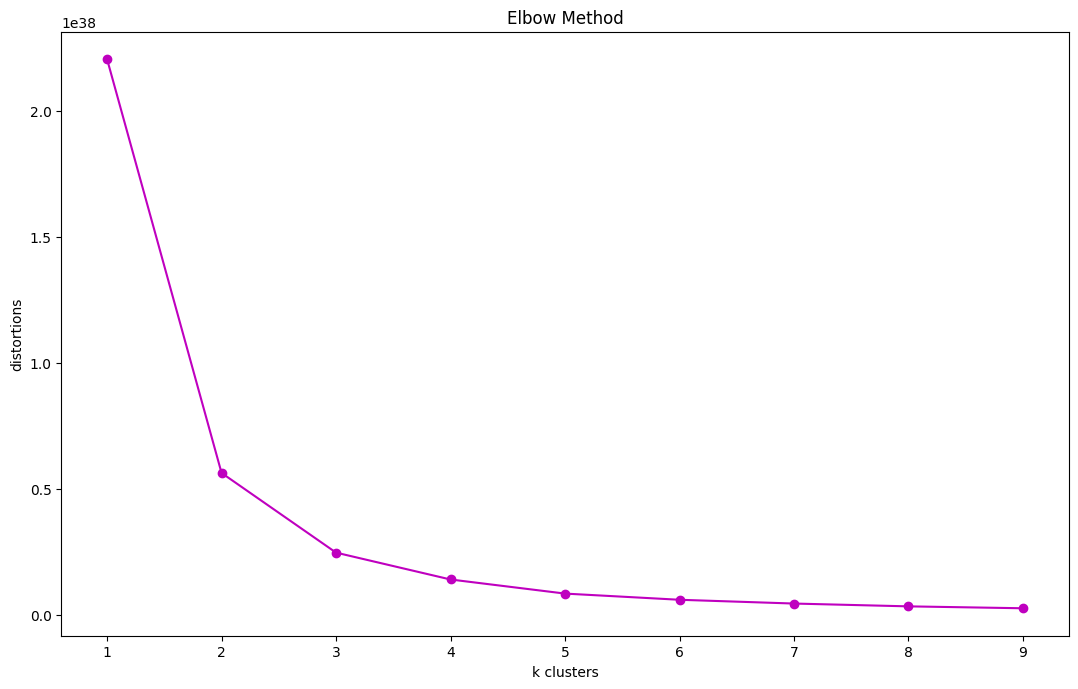

In [130]:
plt.figure(figsize=(13,8), dpi=100)
plt.plot(k_clusters, distortions, 'mo-')
plt.xlabel('k clusters')
plt.ylabel('distortions')
plt.title('Elbow Method')
plt.show()

In [131]:
# fitting kmeans
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=1000, algorithm='elkan')
kmeans_.fit(clustering_lon)
kmeans_pred = kmeans_.fit_predict(clustering_lon)

In [132]:
clustering_lon['kmeans_clusters'] = kmeans_pred
clustering_lon

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
0,1604188800000000000,-0.109323,51.468731,1,59213,0
1,1551398400000000000,-0.139662,51.512911,0,73572,1
2,1622505600000000000,-0.214779,51.444612,1,63247,0
3,1517443200000000000,-0.037628,51.650525,0,58614,2
4,1543622400000000000,-0.114509,51.361712,0,66738,2
...,...,...,...,...,...,...
199995,1519862400000000000,-0.112715,51.603431,0,62817,2
199996,1596240000000000000,0.035658,51.581338,1,64580,0
199997,1614556800000000000,-0.368216,51.571013,1,56772,0
199998,1554076800000000000,-0.096049,51.374219,0,67977,1


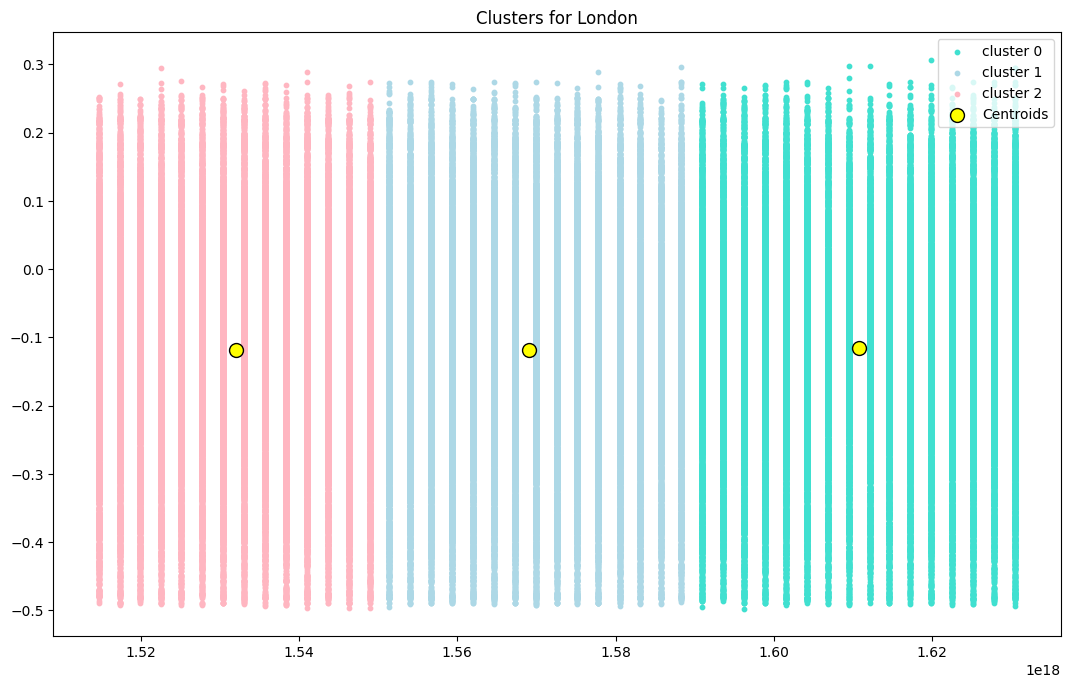

In [133]:
#plotting 
plt.figure(figsize=(13,8), dpi=100)
plt.title('Clusters for London')
plt.scatter(lon_array[kmeans_pred == 0, 0], lon_array[kmeans_pred == 0, 1], s = 10, c='turquoise', label='cluster 0')
plt.scatter(lon_array[kmeans_pred == 1, 0], lon_array[kmeans_pred == 1, 1], s = 10, c='lightblue', label='cluster 1')
plt.scatter(lon_array[kmeans_pred == 2, 0], lon_array[kmeans_pred == 2, 1], s = 10, c='lightpink', label='cluster 2') 
#plt.scatter(lon_array[kmeans_pred == 3, 0], lon_array[kmeans_pred == 3, 1], s = 10, c='orchid', label='cluster 3') 
# Plotting the centroids 
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s = 100, c='yellow', edgecolor='black', label='Centroids')
plt.legend()

In [ ]:
# next we will split the df based on the clusters and create a correlation matrix for each.
# that way we can see which values had an effect for forming each cluster and whether the covid col
# played a role in each cluster by checking the correlation 
# after, to see which cluster was more associated with before or during covid we can take the mean of the covid col for each df 

In [28]:
# split data to separate ones based on the 4 clusters
def split_df(df, cluster_n, city):
  '''
  creates separate dfs for each cluster
  '''
  df = pd.DataFrame(df)


  if city == 1:
    df_new = df[df['kmeans_clusters'] == cluster_n]
    df_new = pd.DataFrame(df_new)
    df_new.to_csv('df_oth{}.csv'.format(cluster_n), index=False)
  else:
    df_new = df[df['kmeans_clusters'] == cluster_n]
    df_new = pd.DataFrame(df_new)
    df_new.to_csv('df{}.csv'.format(cluster_n), index=False)

  return df_new

In [31]:
split_df(clustering_lon, 0, 0)
split_df(clustering_lon, 1, 0)
split_df(clustering_lon, 2, 0)

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
3,1517443200000000000,-0.037628,51.650525,0,58614,2
4,1543622400000000000,-0.114509,51.361712,0,66738,2
6,1533081600000000000,-0.077706,51.477615,0,64528,2
7,1525132800000000000,0.204436,51.599233,0,66002,2
8,1530403200000000000,-0.060120,51.458314,0,69301,2
...,...,...,...,...,...,...
199977,1522540800000000000,-0.175147,51.472796,0,62269,2
199984,1541030400000000000,-0.051036,51.418110,0,69703,2
199988,1541030400000000000,-0.080330,51.588230,0,69703,2
199990,1535760000000000000,-0.335456,51.536347,0,64272,2


In [33]:
df0 = pd.read_csv('df0.csv')
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df2

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
0,1517443200000000000,-0.037628,51.650525,0,58614,2
1,1543622400000000000,-0.114509,51.361712,0,66738,2
2,1533081600000000000,-0.077706,51.477615,0,64528,2
3,1525132800000000000,0.204436,51.599233,0,66002,2
4,1530403200000000000,-0.060120,51.458314,0,69301,2
...,...,...,...,...,...,...
61890,1522540800000000000,-0.175147,51.472796,0,62269,2
61891,1541030400000000000,-0.051036,51.418110,0,69703,2
61892,1541030400000000000,-0.080330,51.588230,0,69703,2
61893,1535760000000000000,-0.335456,51.536347,0,64272,2


In [36]:
# examining the two columns (covid and kmeans)
df0.describe()


,month,longitude,latitude,covid,crimes_count,kmeans_clusters
count,6.410100e+04,64101.000000,64101.000000,64101.0,64101.000000,64101.0
mean,1.610757e+18,-0.115779,51.510918,1.0,59796.270557,0.0
std,1.236023e+16,0.144712,0.067721,0.0,5192.673516,0.0
min,1.590970e+18,-0.497698,51.295145,1.0,47535.000000,0.0
25%,1.598918e+18,-0.201391,51.468625,1.0,56526.000000,0.0
50%,1.609459e+18,-0.107804,51.516218,1.0,61347.000000,0.0
75%,1.622506e+18,-0.025947,51.556506,1.0,63982.000000,0.0
max,1.630454e+18,0.307151,51.685636,1.0,64580.000000,0.0


In [37]:
df1.describe()

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
count,6.503400e+04,65034.000000,65034.000000,65034.000000,65034.000000,65034.0
mean,1.569060e+18,-0.119122,51.510305,0.163868,65972.074392,1.0
std,1.115808e+16,0.142969,0.066491,0.370159,6883.386939,0.0
min,1.551398e+18,-0.494977,51.296579,0.000000,44265.000000,1.0
25%,1.559347e+18,-0.200142,51.470272,0.000000,63895.000000,1.0
50%,1.569888e+18,-0.114301,51.514868,0.000000,68776.000000,1.0
75%,1.577837e+18,-0.033996,51.553858,0.000000,69864.000000,1.0
max,1.588291e+18,0.296870,51.684483,1.000000,73572.000000,1.0


In [38]:
df2.describe()

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
count,6.189500e+04,61895.000000,61895.000000,61895.0,61895.000000,61895.0
mean,1.532002e+18,-0.118206,51.510690,0.0,65632.125584,2.0
std,1.058575e+16,0.141755,0.066017,0.0,2930.540458,0.0
min,1.514765e+18,-0.496766,51.295145,0.0,58614.000000,2.0
25%,1.522541e+18,-0.198208,51.470676,0.0,64272.000000,2.0
50%,1.533082e+18,-0.113877,51.515168,0.0,65877.000000,2.0
75%,1.541030e+18,-0.033291,51.553672,0.0,67773.000000,2.0
max,1.548979e+18,0.294549,51.685636,0.0,69703.000000,2.0


In [ ]:
# as we can see from the means cluster 0 is more assocaited with after covid whereas
# cluster 1 and 2 are associated with before covid. That indicates that there is a difference
# in crime before and after covid. that is also shown in the correlation heatmaps bellow


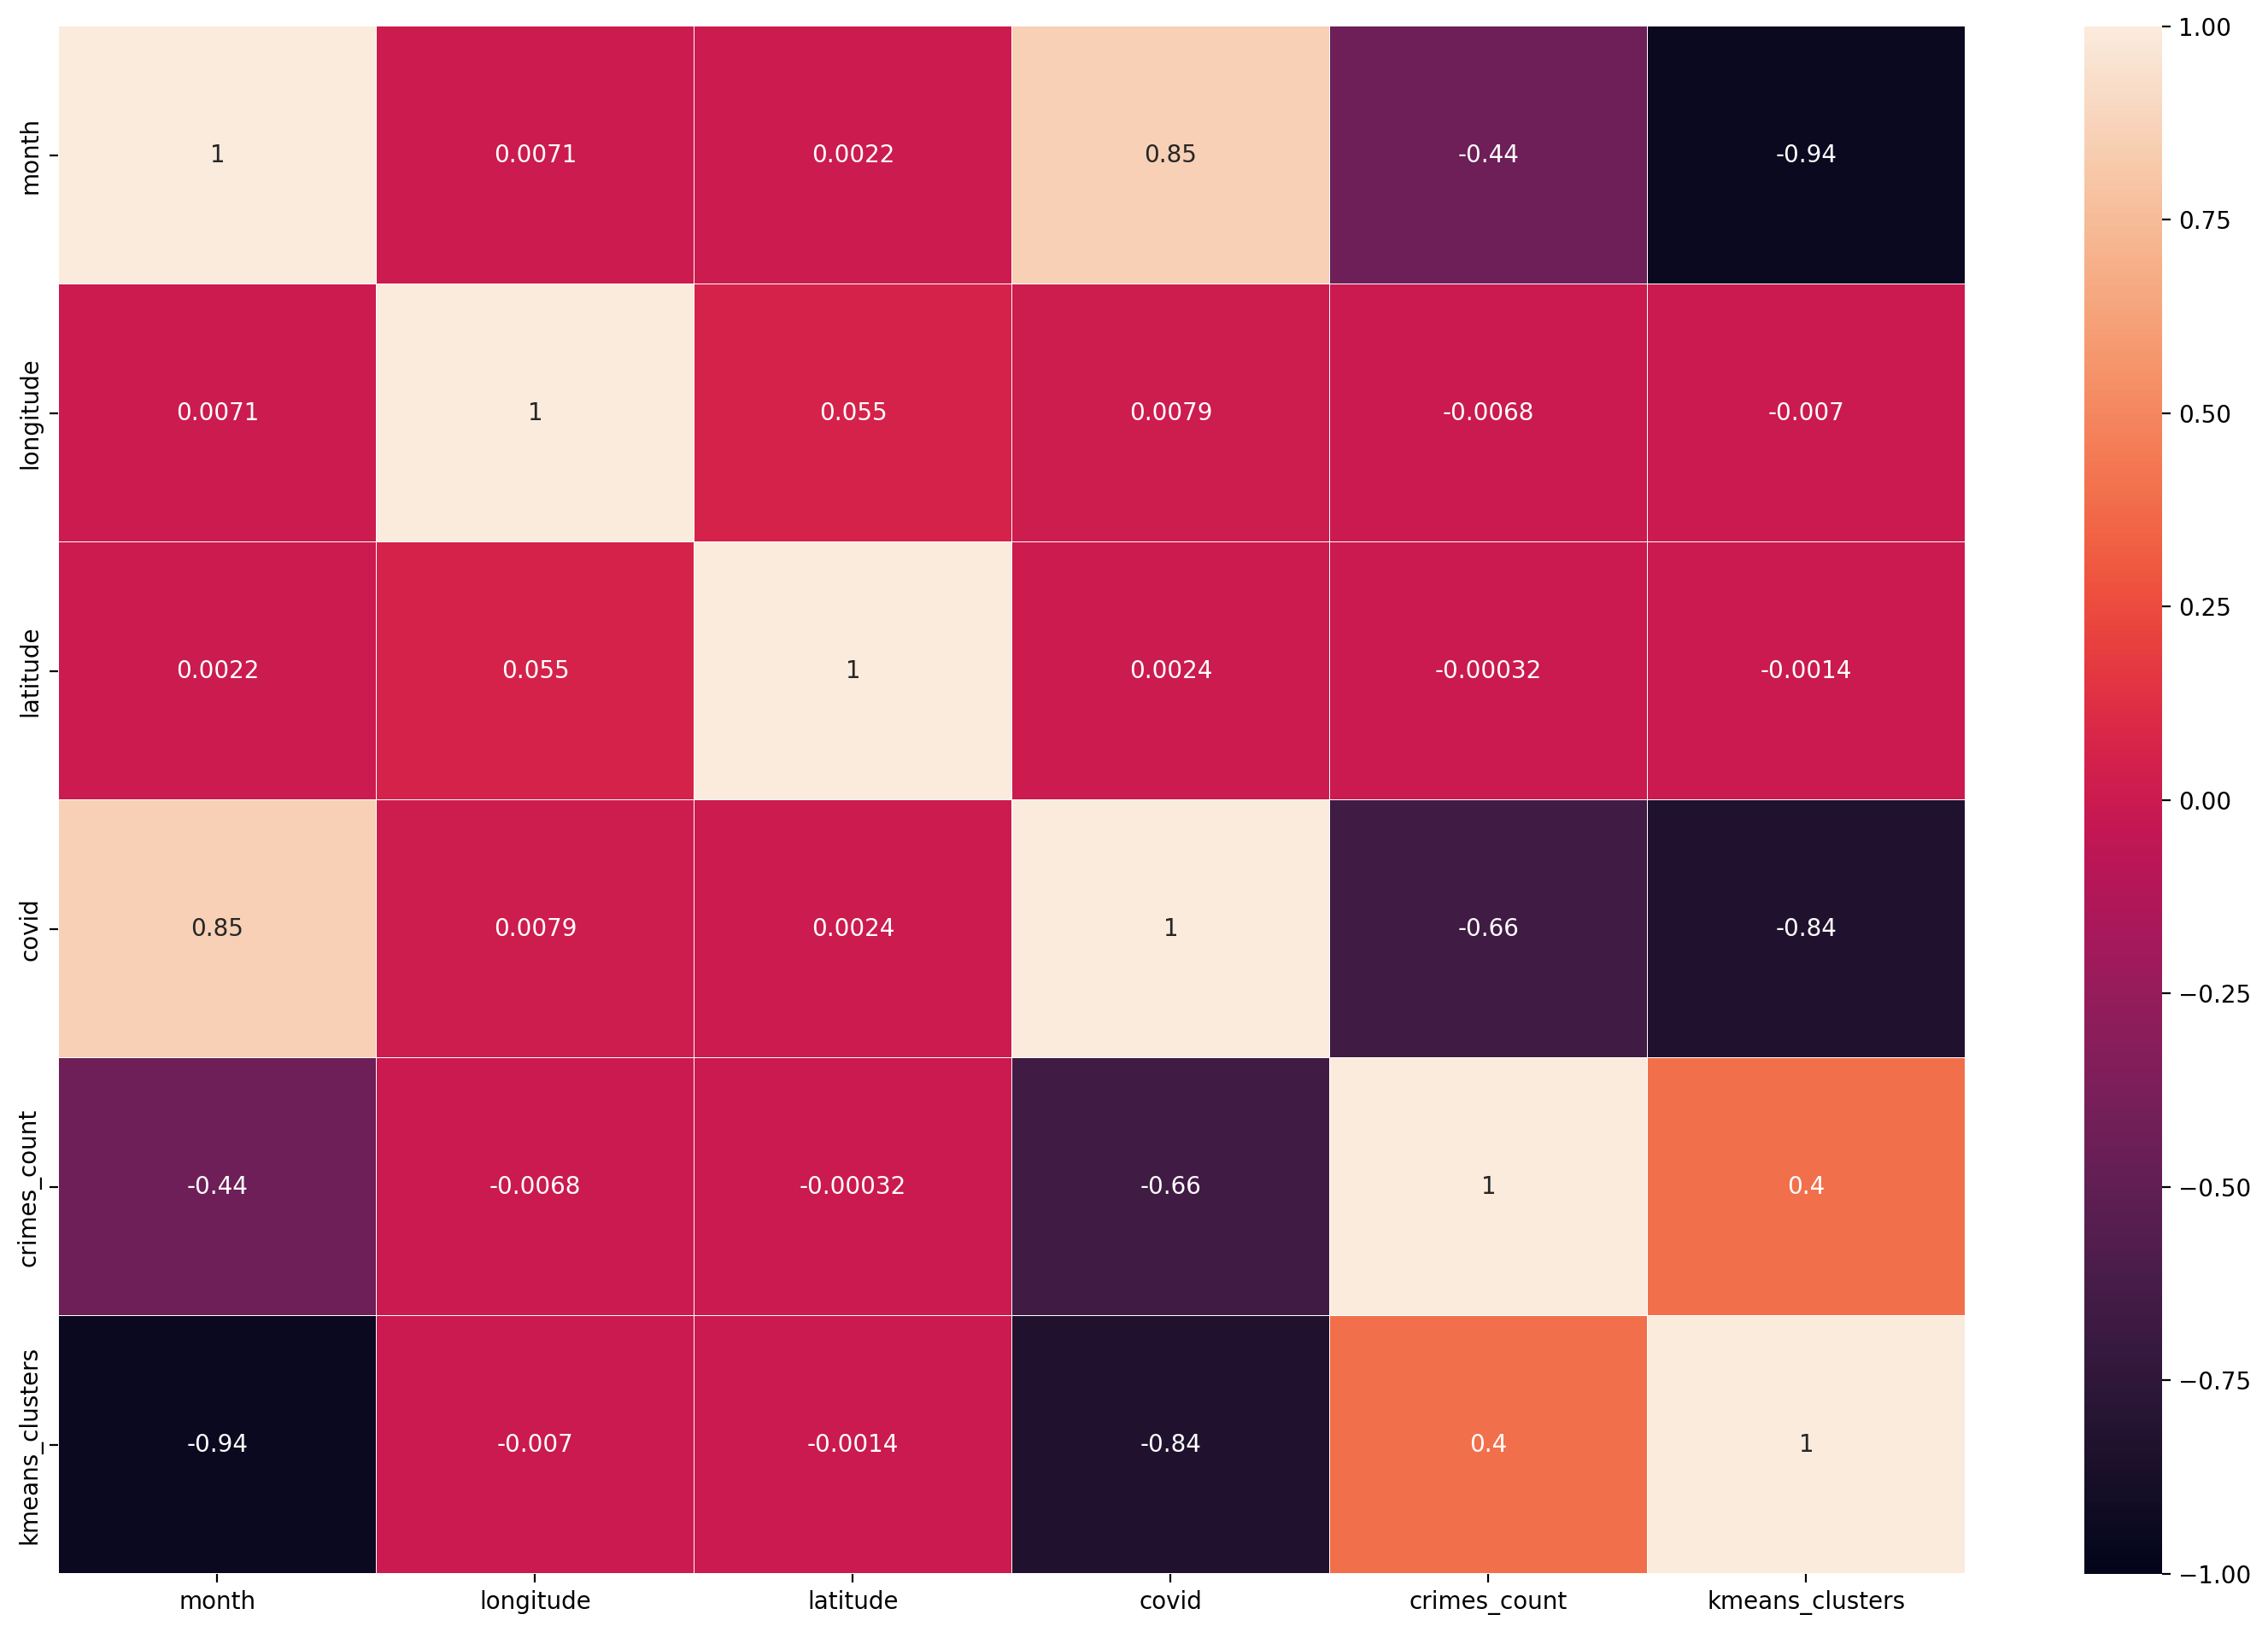

In [168]:
corr_matrix(clustering_lon, linewidth=0.2)

# Other cities

In [39]:
# repeating the same for the other cities
other

,month,longitude,latitude,lsoa_code,stringency,covid,last_outcome_investigation_complete_no_suspect_identified,last_outcome_category_status_update_unavailable,last_outcome_category_suspect_present_action_taken,crime_type_bicycle_theft,crime_type_burglary,crime_type_criminal_damage_and_arson,crime_type_drugs,crime_type_other_crime,crime_type_other_theft,crime_type_possession_of_weapons,crime_type_public_order,crime_type_robbery,crime_type_shoplifting,crime_type_theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,crimes_count
0,1596240000000000000,-0.309091,51.490999,1002565,67.5603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,64580.0
1,1575158400000000000,0.069631,51.552642,1003728,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65919.0
2,1535760000000000000,-0.291239,51.553120,1000635,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,64272.0
3,1577836800000000000,-0.210964,51.454221,1004503,0.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,69864.0
4,1575158400000000000,-0.147038,51.470350,1004564,0.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,65919.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1546300800000000000,-0.150662,51.514605,1004714,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,67773.0
199995,1527811200000000000,-0.127242,51.544817,1000864,0.0000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,65393.0
199996,1627776000000000000,-0.241744,51.455541,1004644,43.9800,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60967.0
199998,1593561600000000000,-0.219236,51.504246,1001943,65.1840,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,63679.0


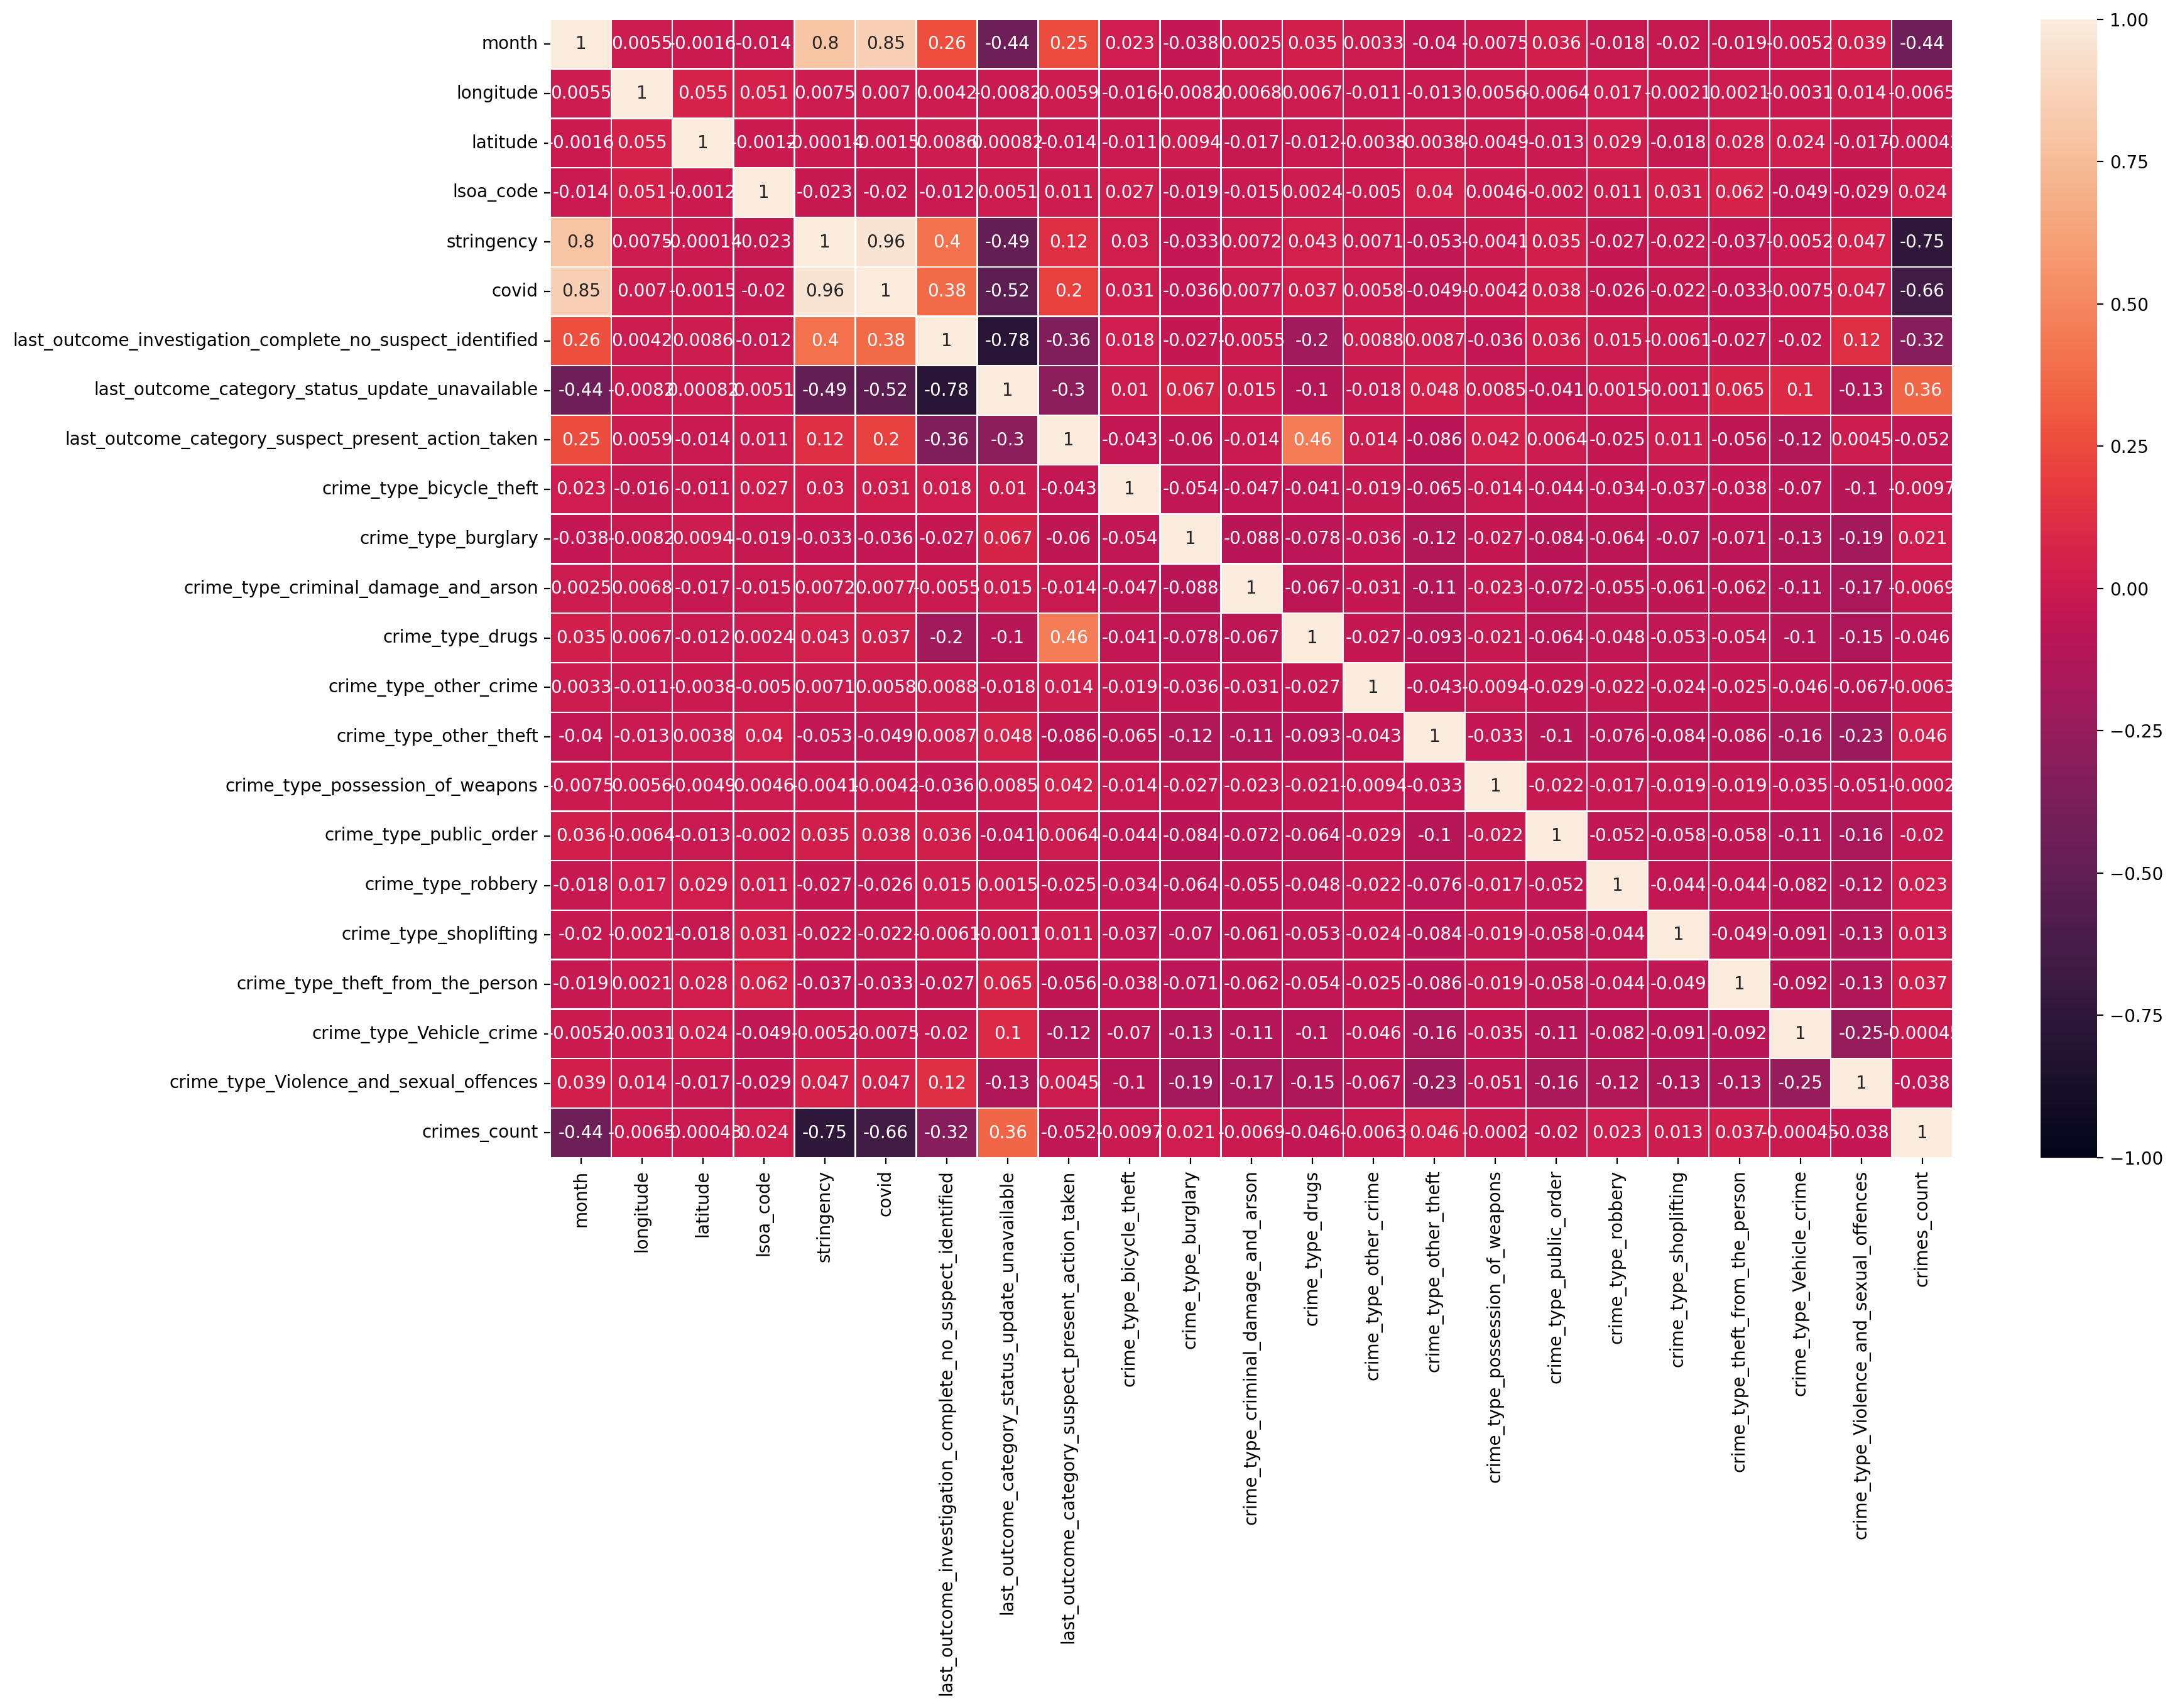

In [51]:
corr_matrix(other, linewidth=0.5)

In [40]:
clustering_oth = other.drop(other.iloc[:, 6:22], axis=1)


In [41]:
clustering_oth = clustering_oth.drop(columns=['lsoa_code', 'stringency'])
clustering_oth

,month,longitude,latitude,covid,crimes_count
0,1596240000000000000,-0.309091,51.490999,1,64580.0
1,1575158400000000000,0.069631,51.552642,0,65919.0
2,1535760000000000000,-0.291239,51.553120,0,64272.0
3,1577836800000000000,-0.210964,51.454221,0,69864.0
4,1575158400000000000,-0.147038,51.470350,0,65919.0
...,...,...,...,...,...
199994,1546300800000000000,-0.150662,51.514605,0,67773.0
199995,1527811200000000000,-0.127242,51.544817,0,65393.0
199996,1627776000000000000,-0.241744,51.455541,1,60967.0
199998,1593561600000000000,-0.219236,51.504246,1,63679.0


In [42]:
oth_array  = np.array(clustering_oth)
oth_array

array([[ 1.5962400e+18, -3.0909100e-01,  5.1490999e+01,  1.0000000e+00,
         6.4580000e+04],
       [ 1.5751584e+18,  6.9631000e-02,  5.1552642e+01,  0.0000000e+00,
         6.5919000e+04],
       [ 1.5357600e+18, -2.9123900e-01,  5.1553120e+01,  0.0000000e+00,
         6.4272000e+04],
       ...,
       [ 1.6277760e+18, -2.4174400e-01,  5.1455541e+01,  1.0000000e+00,
         6.0967000e+04],
       [ 1.5935616e+18, -2.1923600e-01,  5.1504246e+01,  1.0000000e+00,
         6.3679000e+04],
       [ 1.5619392e+18, -3.4764000e-02,  5.1469196e+01,  0.0000000e+00,
         6.9256000e+04]])

In [182]:
distortions2 = []
k_clusters = range(1,10)
for cluster in k_clusters:
    kmeansmodel = KMeans(n_clusters=cluster)
    kmeansmodel.fit(clustering_oth)
    distortions2.append(kmeansmodel.inertia_)

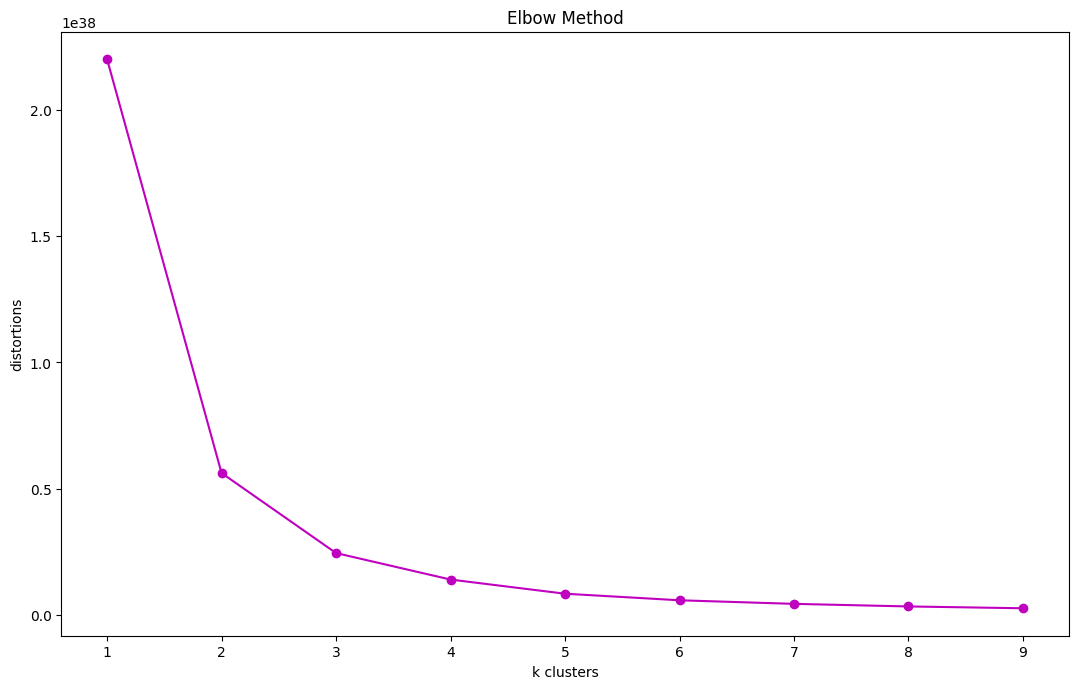

In [112]:
plt.figure(figsize=(13,8), dpi=100)
plt.plot(k_clusters, distortions2, 'mo-')
plt.xlabel('k clusters')
plt.ylabel('distortions')
plt.title('Elbow Method')
plt.show()

In [43]:
# fitting kmeans
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=1000, algorithm='elkan')
kmeans_.fit(clustering_oth)
kmeans_pred2 = kmeans_.fit_predict(clustering_oth)

In [44]:
clustering_oth['kmeans_clusters'] = kmeans_pred2
clustering_oth

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
0,1596240000000000000,-0.309091,51.490999,1,64580.0,0
1,1575158400000000000,0.069631,51.552642,0,65919.0,2
2,1535760000000000000,-0.291239,51.553120,0,64272.0,1
3,1577836800000000000,-0.210964,51.454221,0,69864.0,2
4,1575158400000000000,-0.147038,51.470350,0,65919.0,2
...,...,...,...,...,...,...
199994,1546300800000000000,-0.150662,51.514605,0,67773.0,1
199995,1527811200000000000,-0.127242,51.544817,0,65393.0,1
199996,1627776000000000000,-0.241744,51.455541,1,60967.0,0
199998,1593561600000000000,-0.219236,51.504246,1,63679.0,0


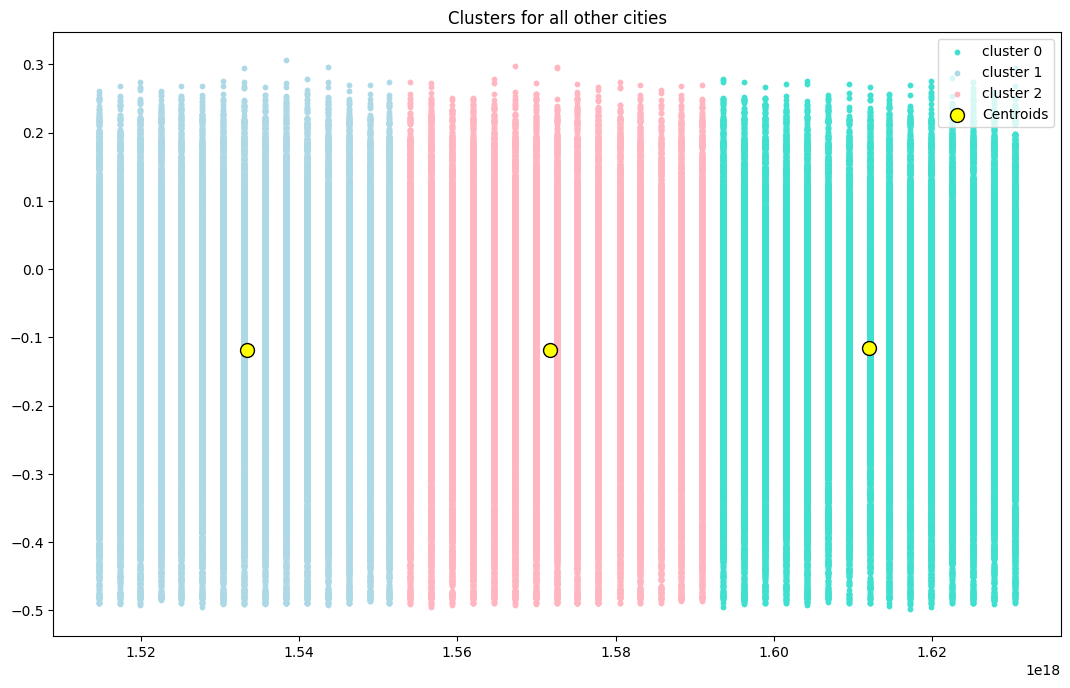

In [185]:
#plotting 
plt.figure(figsize=(13,8), dpi=100)
plt.title('Clusters for all other cities')
plt.scatter(oth_array[kmeans_pred2 == 0, 0], oth_array[kmeans_pred2 == 0, 1], s=10, c='turquoise', label='cluster 0')
plt.scatter(oth_array[kmeans_pred2 == 1, 0], oth_array[kmeans_pred2 == 1, 1], s=10, c='lightblue', label='cluster 1')
plt.scatter(oth_array[kmeans_pred2 == 2, 0], oth_array[kmeans_pred2 == 2, 1], s=10, c='lightpink', label='cluster 2') 
#plt.scatter(oth_array[kmeans_pred2 == 3, 0], oth_array[kmeans_pred2 == 3, 1], s=10, c='orchid', label='cluster 3') 
# Plotting the centroids 
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s=100, c='yellow', edgecolor='black', label='Centroids')
plt.legend()

In [45]:
split_df(clustering_oth, 0, 1)
split_df(clustering_oth, 1, 1)
split_df(clustering_oth, 2, 1)

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
1,1575158400000000000,0.069631,51.552642,0,65919.0,2
3,1577836800000000000,-0.210964,51.454221,0,69864.0,2
4,1575158400000000000,-0.147038,51.470350,0,65919.0,2
5,1561939200000000000,-0.023483,51.570227,0,69256.0,2
8,1569888000000000000,-0.231793,51.552096,0,71543.0,2
...,...,...,...,...,...,...
199980,1554076800000000000,-0.028530,51.507589,0,67977.0,2
199981,1577836800000000000,-0.397514,51.482169,0,69864.0,2
199985,1572566400000000000,-0.019465,51.504945,0,68776.0,2
199992,1564617600000000000,-0.223511,51.509922,0,63895.0,2


In [47]:
df_oth0 = pd.read_csv('df_oth0.csv')
df_oth1 = pd.read_csv('df_oth1.csv')
df_oth2 = pd.read_csv('df_oth2.csv')

In [48]:
df_oth0.describe()

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
count,6.029900e+04,60299.000000,60299.000000,60299.0,60299.000000,60299.0
mean,1.612013e+18,-0.115894,51.510879,1.0,60052.778222,0.0
std,1.165713e+16,0.144263,0.067907,0.0,5235.108766,0.0
min,1.593562e+18,-0.497698,51.295145,1.0,47535.000000,0.0
25%,1.601510e+18,-0.201008,51.468534,1.0,56772.000000,0.0
50%,1.612138e+18,-0.107570,51.516083,1.0,63247.000000,0.0
75%,1.622506e+18,-0.026705,51.556519,1.0,63982.000000,0.0
max,1.630454e+18,0.294549,51.684483,1.0,64580.000000,0.0


In [49]:
df_oth1.describe()

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
count,6.659500e+04,66595.000000,66595.000000,66595.0,66595.000000,66595.0
mean,1.533455e+18,-0.118327,51.511049,0.0,66225.904407,1.0
std,1.129466e+16,0.141599,0.065829,0.0,3456.019169,0.0
min,1.514765e+18,-0.495314,51.298705,0.0,58614.000000,1.0
25%,1.522541e+18,-0.198312,51.471210,0.0,64272.000000,1.0
50%,1.533082e+18,-0.114049,51.515281,0.0,65877.000000,1.0
75%,1.543622e+18,-0.033064,51.554378,0.0,69301.000000,1.0
max,1.551398e+18,0.307151,51.687167,0.0,73572.000000,1.0


In [50]:
df_oth2.describe()

,month,longitude,latitude,covid,crimes_count,kmeans_clusters
count,6.389400e+04,63894.000000,63894.000000,63894.000000,63894.000000,63894.0
mean,1.571693e+18,-0.118167,51.510639,0.224215,64877.967415,2.0
std,1.112649e+16,0.143315,0.066195,0.417068,6858.487390,0.0
min,1.554077e+18,-0.494977,51.298455,0.000000,44265.000000,2.0
25%,1.561939e+18,-0.199085,51.470843,0.000000,63326.000000,2.0
50%,1.572566e+18,-0.112107,51.515039,0.000000,67977.000000,2.0
75%,1.580515e+18,-0.031350,51.553853,0.000000,69736.000000,2.0
max,1.590970e+18,0.298438,51.682409,1.000000,71543.000000,2.0


In [46]:
# we observe the same for the other cities too when we observe the means of the covid column 
# once cluster was formed during covid data and two before covid

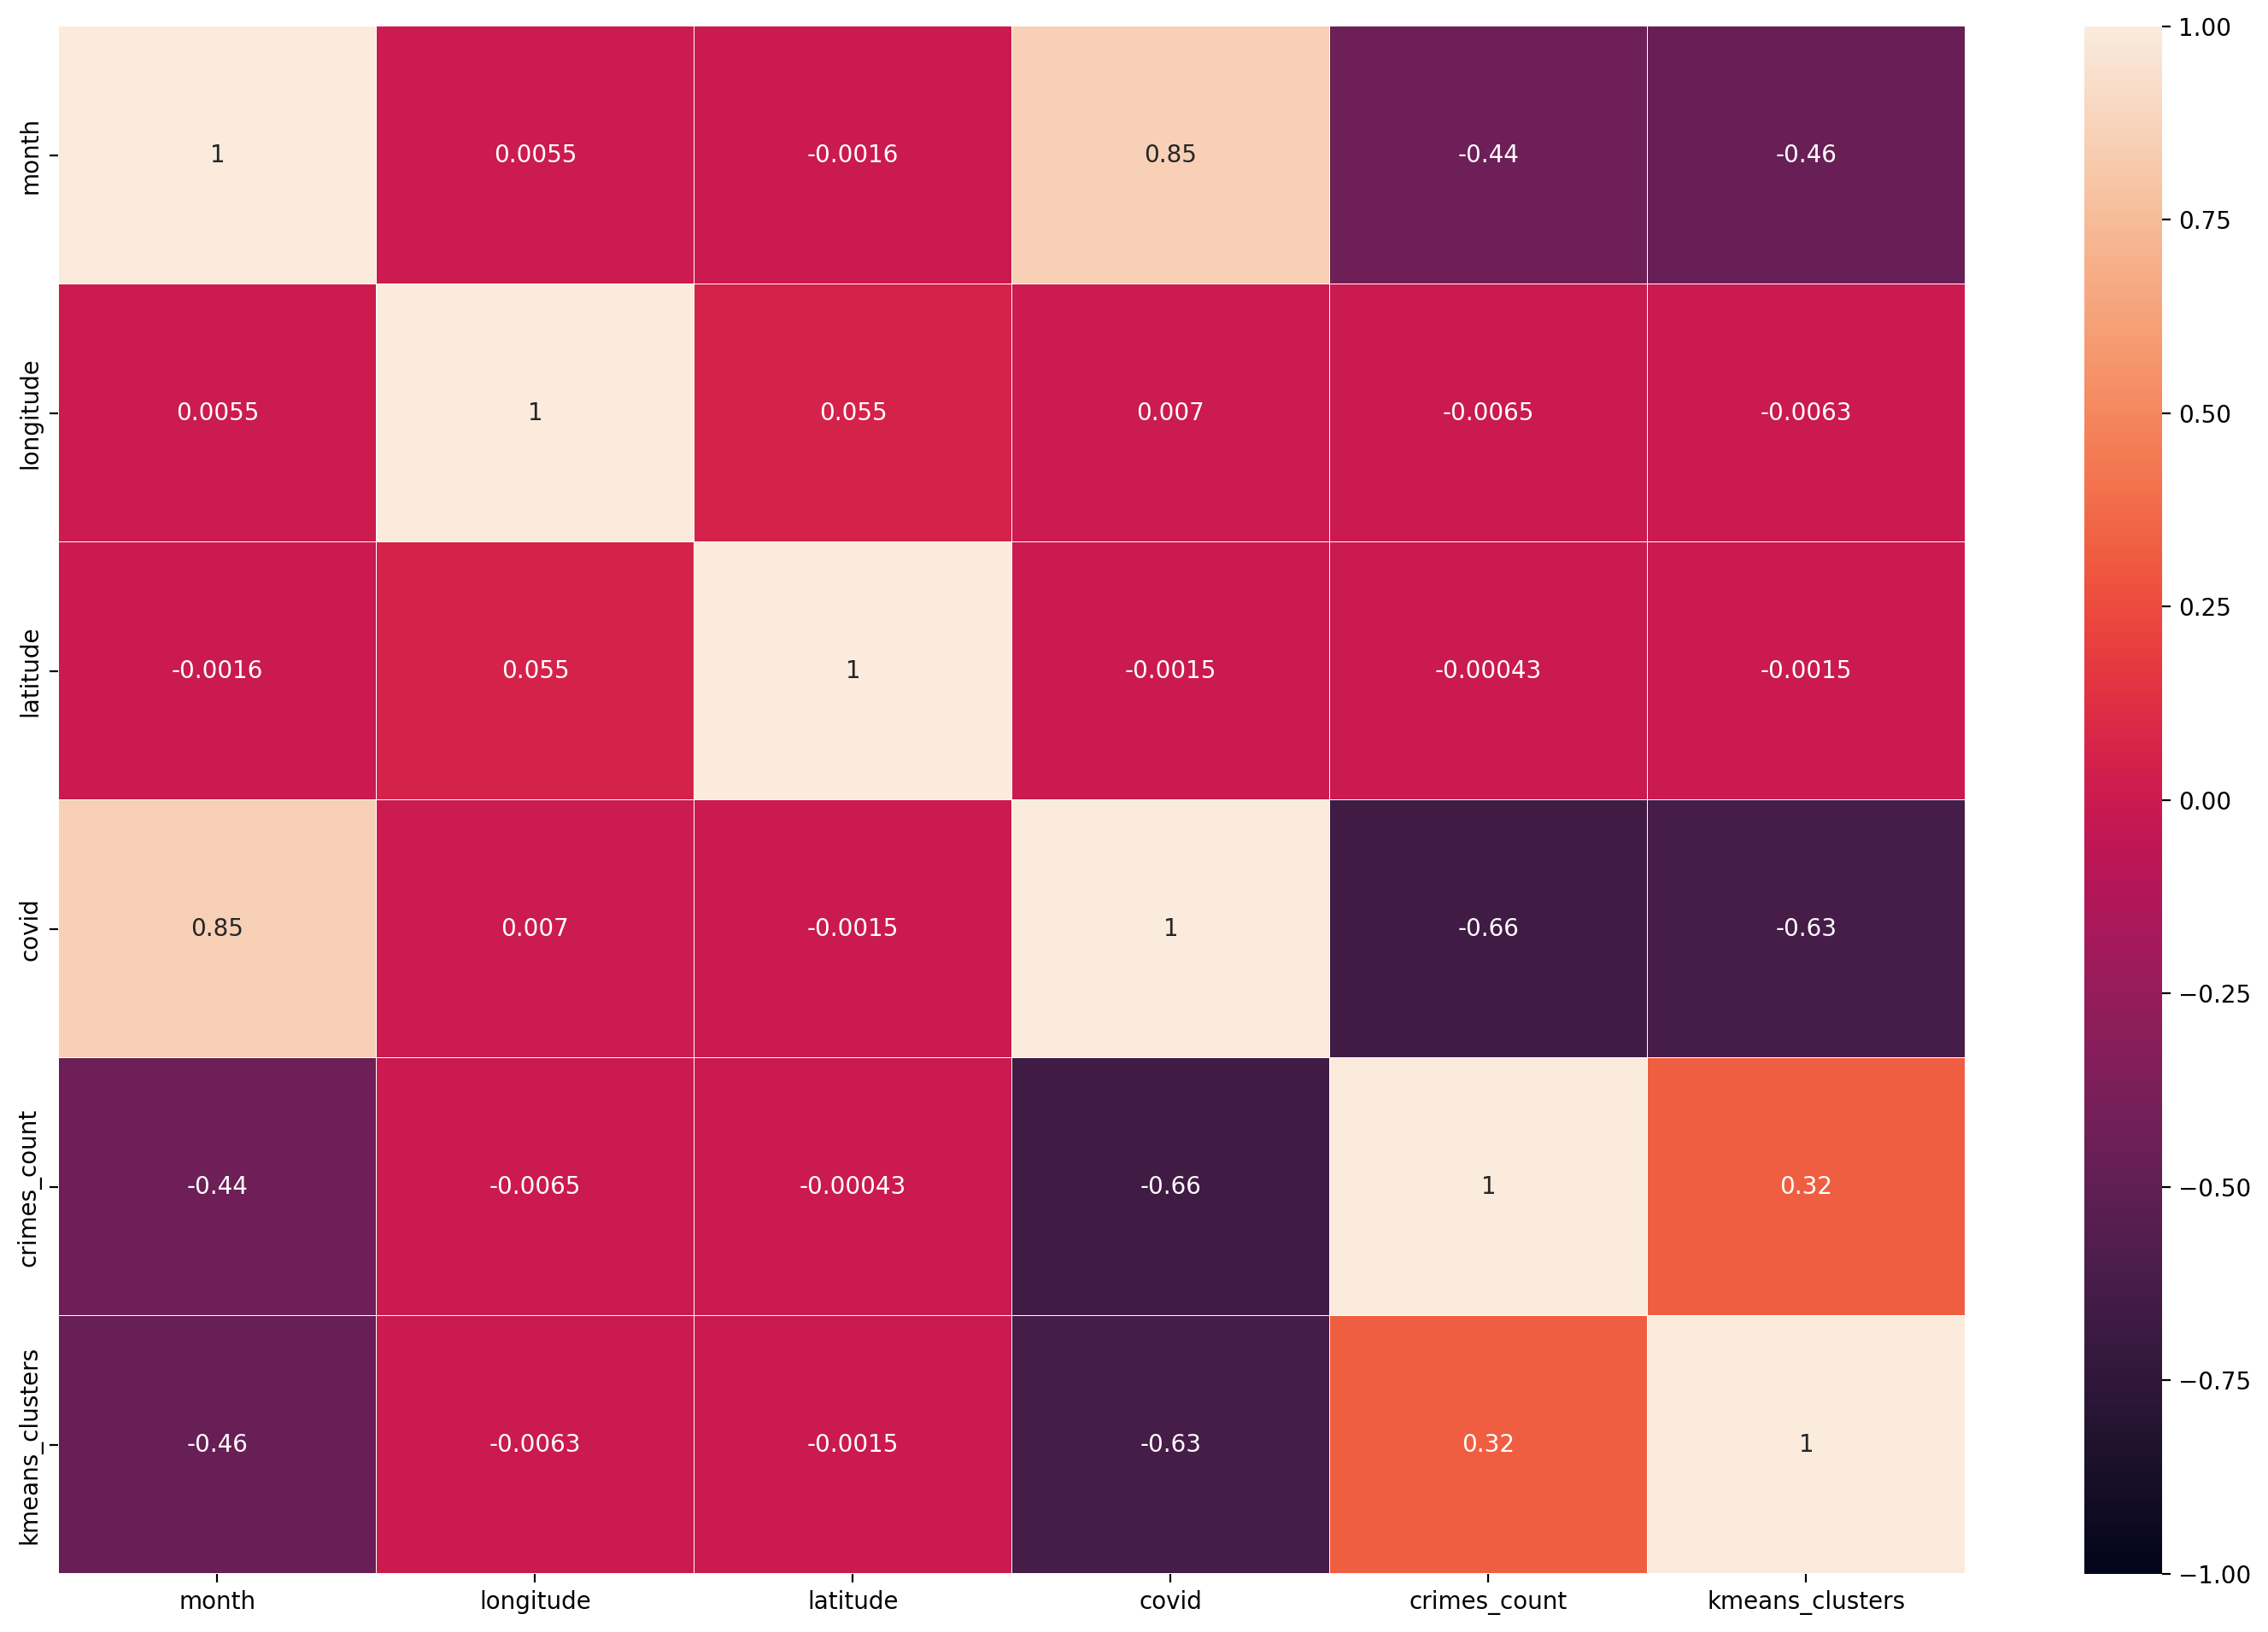

In [174]:
corr_matrix(clustering_oth, linewidth=0.2)

In [ ]:
# from the overall clustering analysis it seems that there is a difference between before and 
# during covid. the ml classifiers and regressors are not the most reliable in the case of our data
# since for almost all our columns, values are repeating as infomation is gathered per month and not per day
# but clustering is more appropriate since we have unclustered data with no labels and gives better results

In [ ]:
# normally clustering is only one of the primary steps in analysis but due to time constraits we did not have time to do more
# next step would be to find differences between the clusters and find unique characteristics/patterns 

In [ ]:
# what we see from the clustering though is that the clusters have strongly to do with covid and is a strong
# feature that affects the formation of the clusters. We can also observe that for thw clusters after covid the 
# crime count is lower which is in line with the rest of our analyses as crime decreased during covid